# Partie 1: Avec plateforme tensorflow

## 1) importation des bibliothèques

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


## 2) Chagrement des données

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [26]:
#Normalisation
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


## 3) modèle 1 (784 -> 120-> 10, activation sigmoid)



### Définition du modèle

In [ ]:
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(784, activation="sigmoid"),
    layers.Dense(120, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fonction de coût et optimiseur

In [ ]:
model1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Entraînement du modèle

In [ ]:
history1 = model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7364 - loss: 0.9597 - val_accuracy: 0.9340 - val_loss: 0.2250
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9253 - loss: 0.2526 - val_accuracy: 0.9517 - val_loss: 0.1617
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9444 - loss: 0.1843 - val_accuracy: 0.9633 - val_loss: 0.1277
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9577 - loss: 0.1406 - val_accuracy: 0.9688 - val_loss: 0.1053
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.1069 - val_accuracy: 0.9718 - val_loss: 0.0932
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0840 - val_accuracy: 0.9742 - val_loss: 0.0871
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9811 - loss: 0.0639 - val_accuracy: 0.9763 - val_loss: 0.0764
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9836 - loss: 0.0558 - val_accuracy: 0.

### Évaluation sur le test set

In [ ]:
loss1, acc1 = model1.evaluate(x_test, y_test)
print(f"Model1 test accuracy: {acc1:.4f}, test loss: {loss1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0828
Model1 test accuracy: 0.9808, test loss: 0.0714


### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


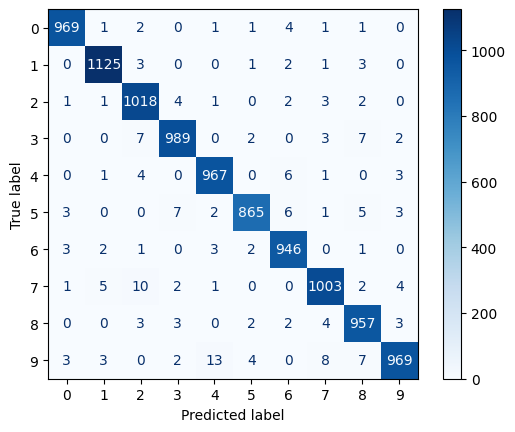

In [ ]:
y_pred1 = model1.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1,axis=1)
cm1 = confusion_matrix(y_test,y_pred_classes1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap="Blues")
plt.show()

| Classe réelle | Prédictions incorrectes |                    
|-- | -- |
| 0 | 11 |
| 1 | 10 |
| 2 | 14 |
| 3 | 21 |
| 4 | 15 |
| 5 | 27 |
| 6 | 12 |
| 7 | 26 |
| 8 | 17 |
| 9 | 40 |

Les chiffres les plus mal classés: 9 (confondu avec 4, 7, 8),  5 (confusions avec 3, 5, 6), 7 (confusions avec 1, 2, 9), 3 (confusions avec 2, 8)  

Cela peut être dû à des chiffres visuellement similaires et à une architecture simple (784 -> 120 -> 10) : pas assez profonde pour apprendre des représentations complexes, donc les petites différences entre chiffres similaires ne sont pas toujours capturées.

### Les courbes de perte et d'accuracy

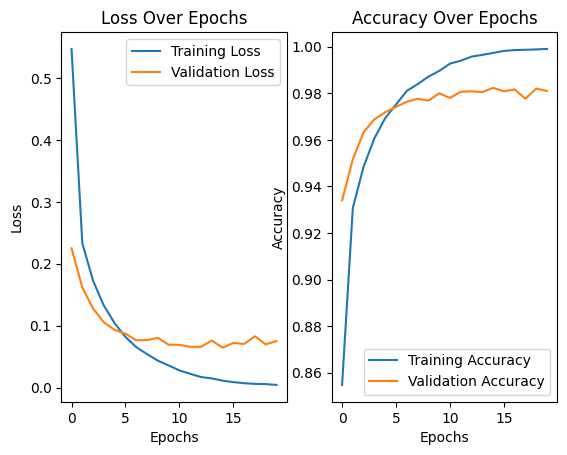

In [ ]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Évolution du loss**  
Le training loss diminue rapidement dès les premières epochs et tend vers 0 à la fin de l'apprentissage, ce qui montre que le modèle s’adapte efficacement aux données d’entraînement.    
Le validation loss diminue aussi rapidement mais se stabilise autour de 0.08, indiquant que le modèle parvient à bien généralise sans sans présenter de signe de surapprentissage.  
**Évolution de l’accuracy**   
L’accuracy sur l'ensemble d’entraînement augmente rapidement et dépasse 0.99, indiquant que le modèle s’ajuste bien aux données d’entraînement.  
L’accuracy sur l'ensemble de validation augmente atteint environ 0.98 et se stabilise, proche de celle d’entraînement: le modèle généralise bien et ne présente pas de surapprentissage significatif.

## 4) modèle 2 (784 -> 120-> 10, activation ReLU)


### Définition du modèle

In [ ]:
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(784, activation="relu"),
    layers.Dense(120, activation="relu"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fonction de coût et optimiseur

In [ ]:
model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Entraînement du modèle

In [ ]:
history2 = model2.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8745 - loss: 0.4295 - val_accuracy: 0.9697 - val_loss: 0.1049
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.0924 - val_accuracy: 0.9750 - val_loss: 0.0828
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9827 - loss: 0.0573 - val_accuracy: 0.9770 - val_loss: 0.0764
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9895 - loss: 0.0336 - val_accuracy: 0.9778 - val_loss: 0.0726
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0230 - val_accuracy: 0.9787 - val_loss: 0.0830
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9797 - val_loss: 0.0825
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9822 - val_loss: 0.0751
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9968 - loss: 0.0107 - val_accuracy: 0.

### Évaluation sur le test set

In [ ]:
loss2, acc2 = model2.evaluate(x_test, y_test)
print(f"Model2 test accuracy: {acc2:.4f}, test loss: {loss2:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9739 - loss: 0.1491
Model2 test accuracy: 0.9774, test loss: 0.1227


### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


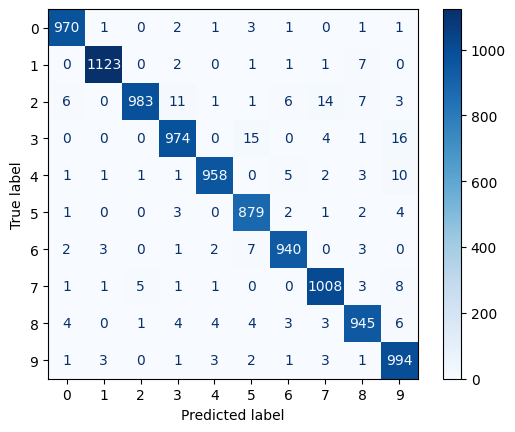

In [ ]:
y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2,axis=1)
cm2 = confusion_matrix(y_test,y_pred_classes2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap="Blues")
plt.show()

| Classe réelle | Prédictions incorrectes |                    
|-- | -- |
| 0 | 10 |
| 1 | 12 |
| 2 | 49 |
| 3 | 36 |
| 4 | 24 |
| 5 | 13 |
| 6 | 18 |
| 7 | 20 |
| 8 | 29 |
| 9 | 15 |

Les chiffres les plus mal classés: 2 (confondu avec 0, 3, 7),  3 (confusions avec 5, 9), 8 (confusions avec 0, 9), 4 (confusions avec 6, 8)

#### Les courbes de perte et d'accuracy

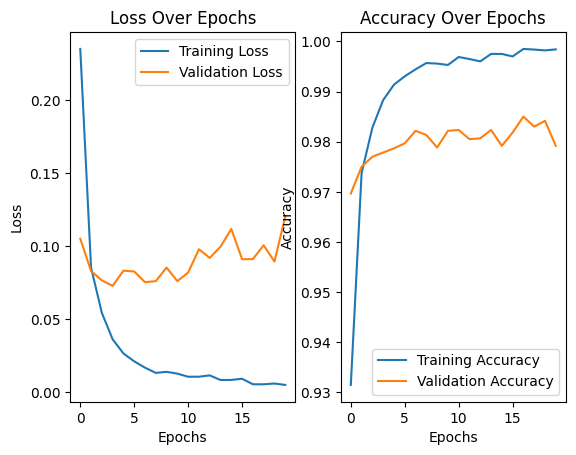

In [ ]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Évolution du loss**  
Le training loss descend presque à zéro, ce qui indique que le modèle apprend très bien sur les données d’entraînement.  
Le validation loss diminue légèrement au début, puis devient instable. Cela montre que le modèle ne généralise pas parfaitement et commence à surapprendre après quelques époques.    
**Évolution de l’accuracy**     
L’accuracy sur l’ensemble d’entraînement est proche de 100 %.  
L’accuracy sur l’ensemble de validation se stabilise entre 97,8 % et 98,2 % : un très bon score, mais inférieur à celui de l’entraînement. Cela confirme la présence d’un léger suraprentissage.


## **Fonction sigmoid:**
* Formule : **σ(x)=1/(1+exp(−x))**
* Sa sortie est comprise entre 0 et 1
* Quand x est très grand ou très petit, sa dérivée devient proche de 0, ce qui engendre le problème de vanishing gradient et ralentit l’apprentissage des couches profondes
* Utilisée surtout dans les couches de sortie pour les problèmes de classification binaire
* L’apprentissage est plus lent mais le modèle converge de façon plus stable (loss finale = 0.0714, accuracy = 0.9808) que ReLU
## **Fonction ReLU:**
* Formule: **ReLU(x) = max(x, 0)**
* Laisse passer les valeurs positives et bloque les négatives, filtrant ainsi certaines caractéristiques et se concentrant sur les plus importantes
* Très utilisée dans les couches cachées, notamment dans les CNN, pour accélérer l’apprentissage et éviter le vanishing gradient
* Ici, avec un réseau peu profond et dense : loss finale = 0.1227, accuracy = 0.9774 donc légèrement moins performant que Sigmoid
* La ReLU montre tout son potentiel dans des architectures plus profondes

## 5) modèle 3.b (784 -> 500 -> 120-> 10, activation sigmoid)

### Définition du modèle

In [ ]:
model3B = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(784, activation="sigmoid"),
    layers.Dense(500, activation="sigmoid"),
    layers.Dense(120, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fonction de coût et optimiseur

In [ ]:
model3B.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Entraînement du modèle

In [ ]:
history3B = model3B.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6507 - loss: 1.1045 - val_accuracy: 0.9372 - val_loss: 0.2184
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9317 - loss: 0.2316 - val_accuracy: 0.9610 - val_loss: 0.1418
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9523 - loss: 0.1583 - val_accuracy: 0.9650 - val_loss: 0.1219
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9649 - loss: 0.1195 - val_accuracy: 0.9710 - val_loss: 0.1012
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9721 - loss: 0.0930 - val_accuracy: 0.9743 - val_loss: 0.0897
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.0755 - val_accuracy: 0.9758 - val_loss: 0.0848
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0529 - val_accuracy: 0.9772 - val_loss: 0.0782
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0414 - val_accuracy: 0.

### Évaluation sur le test set

In [ ]:
loss3B, acc3B = model3B.evaluate(x_test, y_test)
print(f"Model3B test accuracy: {acc3B:.4f}, test loss: {loss3B:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9792 - loss: 0.0961
Model3B test accuracy: 0.9819, test loss: 0.0807


### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


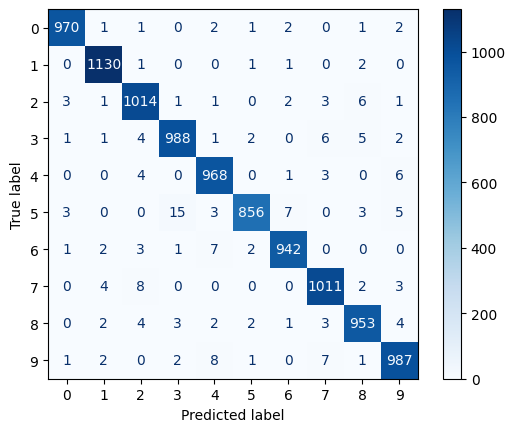

In [ ]:
y_pred3B = model3B.predict(x_test)
y_pred_classes3B = np.argmax(y_pred3B,axis=1)
cm3B = confusion_matrix(y_test,y_pred_classes3B)
disp3B = ConfusionMatrixDisplay(confusion_matrix=cm3B)
disp3B.plot(cmap="Blues")
plt.show()

| Classe réelle | Prédictions incorrectes |                    
|-- | -- |
| 0 | 10 |
| 1 | 5 |
| 2 | 18 |
| 3 | 22 |
| 4 | 14 |
| 5 | 36 |
| 6 | 16 |
| 7 | 17 |
| 8 | 21 |
| 9 | 22 |

Les chiffres les plus mal classés: 5 (confondu avec 3, 6),  3 (confusions avec 7, 8), 9 (confusions avec 4, è), 8 (confusions avec 2, 9)

### Les courbes de perte et d'accuracy

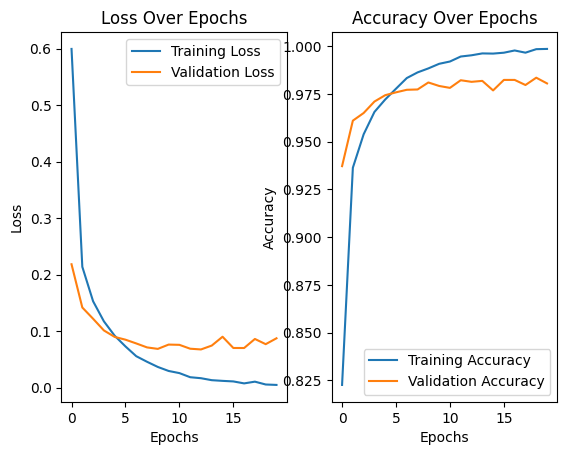

In [ ]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history3B.history['loss'], label='Training Loss')
plt.plot(history3B.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history3B.history['accuracy'], label='Training Accuracy')
plt.plot(history3B.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Évolution du loss**  
Le training loss diminue rapidement dès les premières epochs et tend vers 0 à la fin de l'apprentissage, ce qui montre que le modèle s’adapte efficacement aux données d’entraînement.    
Le validation loss diminue aussi rapidement mais se stabilise autour de 0.09, indiquant que le modèle parvient à bien généralise sans sans présenter de signe de surapprentissage.   
**Évolution de l’accuracy**   
L’accuracy sur l'ensemble d’entraînement augmente rapidement et dépasse 0.99, indiquant que le modèle s’ajuste bien aux données d’entraînement.  
L’accuracy sur l'ensemble de validation augmente atteint environ 0.98 et se stabilise, proche de celle d’entraînement: le modèle généralise bien et ne présente pas de surapprentissage significatif.

## 6) modèle 3.c (784 -> 500 -> 120-> 10, activation ReLU)

### Définition du modèle

In [ ]:
model3C = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(784, activation="relu"),
    layers.Dense(500, activation="relu"),
    layers.Dense(120, activation="relu"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fonction de coût et optimiseur

In [ ]:
model3C.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Entraînement du modèle

In [ ]:
history3C = model3C.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8842 - loss: 0.4062 - val_accuracy: 0.9757 - val_loss: 0.0901
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.0798 - val_accuracy: 0.9795 - val_loss: 0.0681
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9842 - loss: 0.0496 - val_accuracy: 0.9787 - val_loss: 0.0729
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9871 - loss: 0.0376 - val_accuracy: 0.9763 - val_loss: 0.0887
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9798 - val_loss: 0.0719
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9798 - val_loss: 0.0752
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0197 - val_accuracy: 0.9812 - val_loss: 0.0776
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.

### Évaluation sur le test set

In [ ]:
loss3C, acc3C = model3C.evaluate(x_test, y_test)
print(f"Model3C test accuracy: {acc3C:.4f}, test loss: {loss3C:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9804 - loss: 0.1081
Model3C test accuracy: 0.9823, test loss: 0.0950


### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


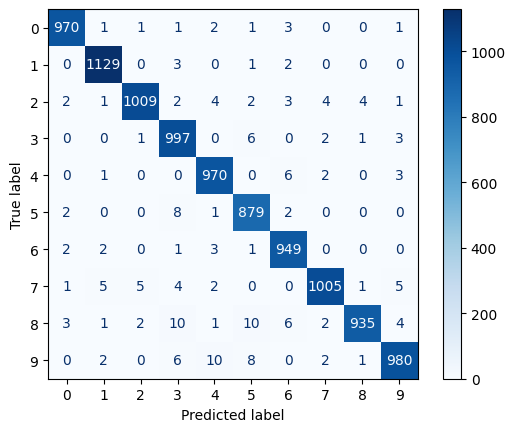

In [ ]:
y_pred3C = model3C.predict(x_test)
y_pred_classes3C = np.argmax(y_pred3C,axis=1)
cm3C = confusion_matrix(y_test,y_pred_classes3C)
disp3C = ConfusionMatrixDisplay(confusion_matrix=cm3C)
disp3C.plot(cmap="Blues")
plt.show()

| Classe réelle | Prédictions incorrectes |                    
|-- | -- |
| 0 | 10 |
| 1 | 6 |
| 2 | 23 |
| 3 | 13 |
| 4 | 12 |
| 5 | 13 |
| 6 | 9 |
| 7 | 23 |
| 8 | 39 |
| 9 | 29 |

Les chiffres les plus mal classés: 8 (confondu avec 3, 5, 6),  9 (confusions avec 4, 5, 3), 2 (confusions avec 4, 7, 8), 7 (confusions avec 1, 2, 9)

### Les courbes de perte et d'accuracy

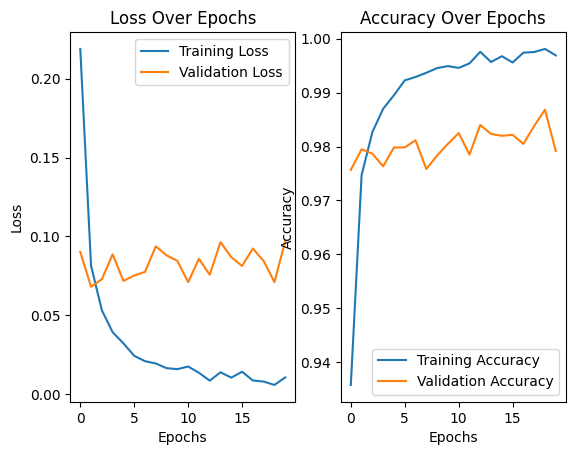

In [ ]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history3C.history['loss'], label='Training Loss')
plt.plot(history3C.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history3C.history['accuracy'], label='Training Accuracy')
plt.plot(history3C.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Évolution du loss**  
Le training loss descend presque à zéro, ce qui indique que le modèle apprend bien sur les données d’entraînement.  
Le validation loss reste instable au long des époques. Cela montre que le modèle ne généralise pas parfaitement et a tendance à surapprendre.  
**Évolution de l’accuracy**  
L’accuracy sur l’ensemble d’entraînement est proche de 100 %.  
L’accuracy sur l’ensemble de validation reste instable, ce qui confirme la présence d’un  surapprentissage.

## 7) Binarisation par Otsu

##**Principe de la binarisation par Otsu**

La binarisation d’Otsu est une méthode automatique de seuillage qui permet de transformer une image en noir et blanc (valeurs 0 ou 1).
Elle calcule un seuil optimal séparant les pixels en deux classes (fond et objet) de manière à minimiser la variance intra-classe et maximiser la variance inter-classe.
Cette technique est utile pour simplifier les données et réduire le bruit, mais elle peut parfois perdre des détails importants dans les images complexes.

### Définition de fonction Otsu

In [27]:
def apply_otsu(images):
    binarized = []
    for img in images:
        img_uint8 = img.astype(np.uint8)
        _, img_otsu = cv2.threshold(img_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        binarized.append(img_otsu / 255.0)
    return np.array(binarized, dtype="float32")


In [28]:
x_trainOtsu = apply_otsu(x_train)
x_testOtsu  = apply_otsu(x_test)

### Définition du modèle

In [ ]:
modelOtsu = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(784, activation="sigmoid"),
    layers.Dense(120, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fonction de coût et optimiseur

In [ ]:
modelOtsu.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Entraînement du modèle

In [ ]:
historyOtsu = modelOtsu.fit(x_trainOtsu, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1686 - loss: 2.2548 - val_accuracy: 0.3253 - val_loss: 1.8857
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3665 - loss: 1.8167 - val_accuracy: 0.3915 - val_loss: 1.7112
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3936 - loss: 1.7002 - val_accuracy: 0.4068 - val_loss: 1.6836
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4063 - loss: 1.6659 - val_accuracy: 0.4085 - val_loss: 1.6394
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4070 - loss: 1.6518 - val_accuracy: 0.3992 - val_loss: 1.6839
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4127 - loss: 1.6301 - val_accuracy: 0.4130 - val_loss: 1.6326
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4133 - loss: 1.6324 - val_accuracy: 0.4122 - val_loss: 1.6324
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4121 - loss: 1.6279 - val_accuracy: 0.

### Évaluation sur le test set

In [ ]:
lossOtsu, accOtsu = modelOtsu.evaluate(x_testOtsu, y_test)
print(f"ModelOtsu test accuracy: {accOtsu:.4f}, test loss: {lossOtsu:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3957 - loss: 1.7039
ModelOtsu test accuracy: 0.4159, test loss: 1.6421


### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


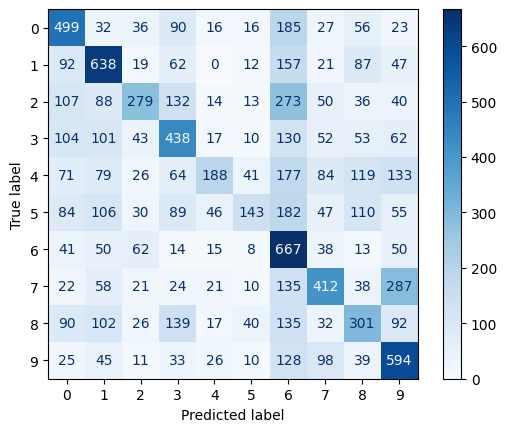

In [ ]:
y_predOtsu = modelOtsu.predict(x_testOtsu)
y_pred_classesOtsu = np.argmax(y_predOtsu,axis=1)
cmOtsu = confusion_matrix(y_test,y_pred_classesOtsu)
dispOtsu = ConfusionMatrixDisplay(confusion_matrix=cmOtsu)
dispOtsu.plot(cmap="Blues")
plt.show()

| Classe réelle | Prédictions incorrectes |                    
|-- | -- |
| 0 | 481 |
| 1 | 497 |
| 2 | 480 |
| 3 | 572 |
| 4 | 794 |
| 5 | 749 |
| 6 | 291 |
| 7 | 616 |
| 8 | 673 |
| 9 | 410 |

Tous les chiffres les plus mal classés, ce qui explique la faible accuracy: 0.4159  
La binarisation par Otsu entraîne une perte d’information, rendant la distinction des chiffres visuellement proches très difficile pour le modèle.

### Les courbes de perte et d'accuracy

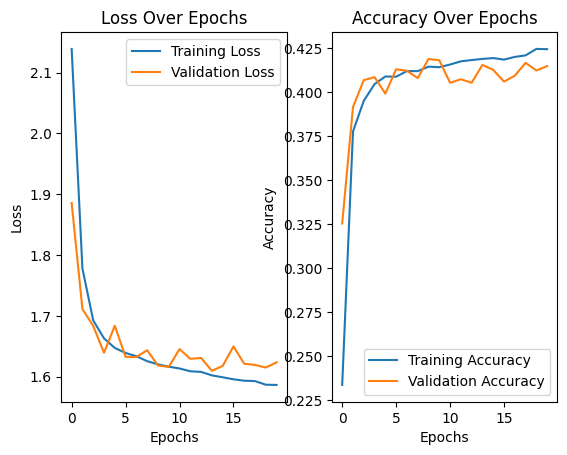

In [ ]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(historyOtsu.history['loss'], label='Training Loss')
plt.plot(historyOtsu.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(historyOtsu.history['accuracy'], label='Training Accuracy')
plt.plot(historyOtsu.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Évolution du loss**  

Le training loss diminue rapidement dès les premières époques et tend vers 1,6 à la fin de l'apprentissage, ce qui montre que le modèle apprend sur les données d’entraînement.     

Le validation loss diminue également rapidement mais se stabilise légèrement autour de 1,65, indiquant que le modèle généralise assez bien sur les données de validation, sans surapprentissage marqué.   

**Évolution de l’accuracy**   

L’accuracy sur l'ensemble d’entraînement augmente rapidement et se stabilise à 0,425, ce qui indique que le modèle apprend certaines caractéristiques des chiffres binarisés, mais reste limité dans sa performance globale, probablement à cause de la perte d’information lors de la binarisation.  

L’accuracy sur l'ensemble de validation augmente au début des premières époques et se stabilise légèrement autour de 0,415, proche de celle de l’entraînement.

### Affichage de neuf images du dataset

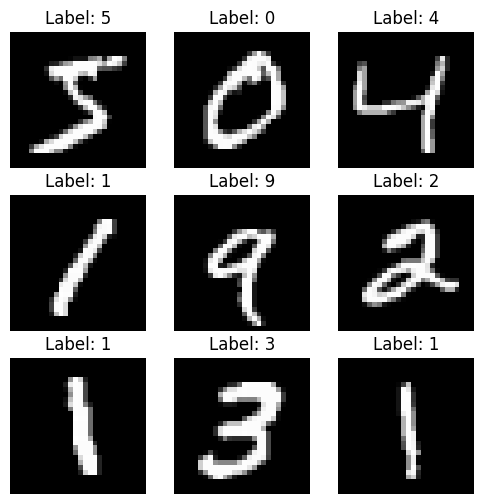

In [ ]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Même avec une précision de 98%, certaines erreurs persistent sur MNIST :  
* Ambiguïté des chiffres manuscrits : certains chiffres sont mal écrits ou difficiles à distinguer (ex. 4 et 9, 3 et 5).
* Bruit dans les images : imperfections, flou, rotation ou décalage des chiffres.
* Limites du modèle : incapacité à capturer certaines variations subtiles de forme.
* Sur-apprentissage / sous-apprentissage : le modèle peut être trop spécifique aux images d’entraînement ou pas assez puissant pour généraliser parfaitement.

## **Rôle de l’optimiseur Adam**

Adam (Adaptive Moment Estimation) est un optimiseur très populaire en deep learning.

1.   Combine Momentum et RMSProp : Adam garde une trace à la fois du dégradé (premier moment) et du dégradé carré (deuxième moment), assurant une convergence plus douce et plus rapide.
2.   Correction des biais : Adam utilise la correction des biais pour stabiliser les moyennes mobiles, en particulier pendant les premières étapes de l’entraînement, ce qui les rend plus fiables.


### **Autres optimiseurs et leurs cas d’usage**
* SGD (Stochastic Gradient Descent) :	Met à jour les poids en fonction du gradient moyen d’un batch. Peut inclure momentum.	Simple, stable pour grands datasets, utile pour comprendre le comportement de base du réseau.
* SGD avec momentum	: Ajoute une mémoire des gradients passés pour accélérer l’apprentissage.	Quand on veut réduire les oscillations dans les minima.
* RMSProp	: Adapte le learning rate pour chaque paramètre en fonction des gradients récents.	Réseaux récurrents (RNN), données séquentielles ou bruitées.
* Adagrad	: Learning rate adaptatif pour chaque paramètre, diminue automatiquement le pas pour les paramètres fréquemment mis à jour.	Données clairsemées ou problèmes NLP.
* Nadam	: Adam + Nesterov momentum, version plus rapide et parfois plus stable qu’Adam.	Cas où Adam converge lentement ou pour des réseaux plus profonds.


## 8) modèle (784 -> 500 -> 120-> 10, activation sigmoid) avec l'optimiseur RMSProp

### Définition du modèle

In [ ]:
modelR = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(784, activation="sigmoid"),
    layers.Dense(500, activation="sigmoid"),
    layers.Dense(120, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fonction de coût et optimiseur

In [ ]:
modelR.compile(
    optimizer="RMSprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Entraînement du modèle

In [ ]:
historyR = modelR.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5211 - loss: 1.4144 - val_accuracy: 0.8897 - val_loss: 0.3596
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8962 - loss: 0.3434 - val_accuracy: 0.9358 - val_loss: 0.2207
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9252 - loss: 0.2488 - val_accuracy: 0.9465 - val_loss: 0.1744
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9391 - loss: 0.2007 - val_accuracy: 0.9590 - val_loss: 0.1434
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9504 - loss: 0.1617 - val_accuracy: 0.9665 - val_loss: 0.1214
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9583 - loss: 0.1372 - val_accuracy: 0.9675 - val_loss: 0.1134
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1167 - val_accuracy: 0.9715 - val_loss: 0.1001
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9693 - loss: 0.0981 - val_accuracy: 0.

### Évaluation sur le test set

In [ ]:
lossR, accR = modelR.evaluate(x_test, y_test)
print(f"ModelR test accuracy: {accR:.4f}, test loss: {lossR:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9716 - loss: 0.0971
ModelR test accuracy: 0.9775, test loss: 0.0786


### Matrice de confusion



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


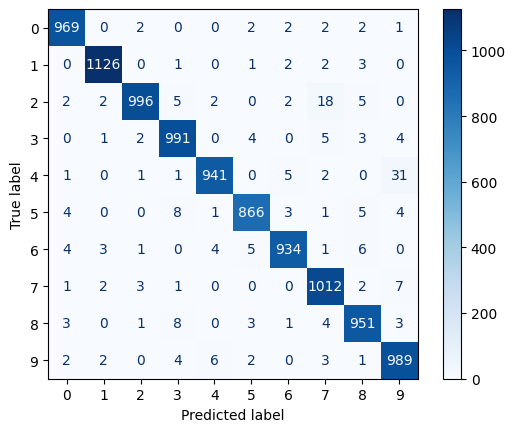

In [ ]:
y_predR = modelR.predict(x_test)
y_pred_classesR = np.argmax(y_predR,axis=1)
cmR = confusion_matrix(y_test,y_pred_classesR)
dispR = ConfusionMatrixDisplay(confusion_matrix=cmR)
dispR.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

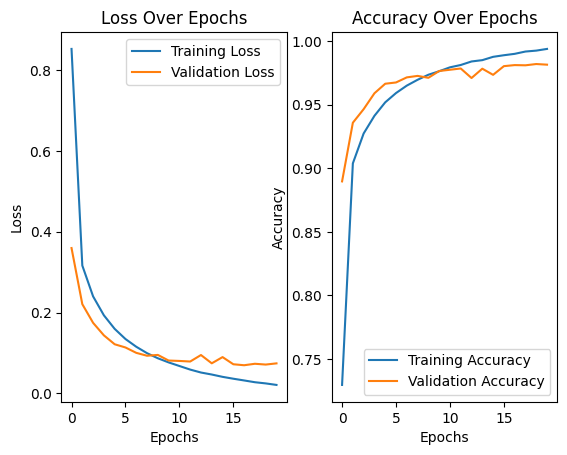

In [ ]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(historyR.history['loss'], label='Training Loss')
plt.plot(historyR.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(historyR.history['accuracy'], label='Training Accuracy')
plt.plot(historyR.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Le modèle converge bien sans signe évident d’overfitting.  
Les courbes de loss et d’accuracy sont cohérentes et stables.

## 9) modèle 3.b (784 -> 500 -> 120-> 10, activation LeakyReLU)

### Définition du modèle

In [ ]:
modelL = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(784),
    layers.LeakyReLU(),
    layers.Dense(500),
    layers.LeakyReLU(),
    layers.Dense(120),
    layers.LeakyReLU(),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fonction de coût et optimiseur

In [ ]:
modelL.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Entraînement du modèle

In [ ]:
historyL = modelL.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8759 - loss: 0.4125 - val_accuracy: 0.9612 - val_loss: 0.1262
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9634 - loss: 0.1180 - val_accuracy: 0.9710 - val_loss: 0.0993
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0869 - val_accuracy: 0.9680 - val_loss: 0.1043
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.0730 - val_accuracy: 0.9765 - val_loss: 0.0810
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9830 - loss: 0.0533 - val_accuracy: 0.9708 - val_loss: 0.1074
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9848 - loss: 0.0465 - val_accuracy: 0.9763 - val_loss: 0.0957
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9848 - loss: 0.0468 - val_accuracy: 0.9702 - val_loss: 0.1158
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0470 - val_accuracy: 0.

### Évaluation sur le test set

In [ ]:
lossL, accL = modelL.evaluate(x_test, y_test)
print(f"ModelL test accuracy: {accL:.4f}, test loss: {lossL:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.1511
ModelL test accuracy: 0.9756, test loss: 0.1302


### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


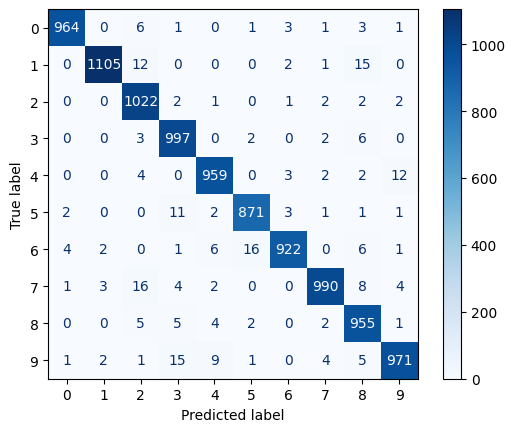

In [ ]:
y_predL = modelL.predict(x_test)
y_pred_classesL = np.argmax(y_predL,axis=1)
cmL = confusion_matrix(y_test,y_pred_classesL)
dispL = ConfusionMatrixDisplay(confusion_matrix=cmL)
dispL.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

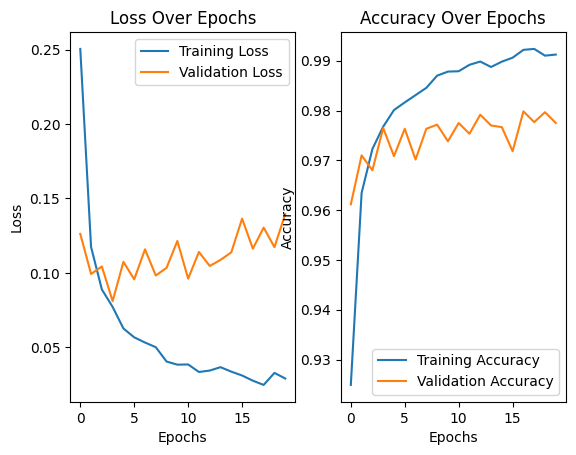

In [ ]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(historyL.history['loss'], label='Training Loss')
plt.plot(historyL.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(historyL.history['accuracy'], label='Training Accuracy')
plt.plot(historyL.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Les courbes de loss et d’accuracy ne sont pas cohérentes et ne sont pas stables.

## 10) modèle (784 -> 500 -> 120-> 10, activation sigmoid) avec Dropout


**Dropout** est une technique de régularisation permettant de réduire l’overfitting lors de l’entraînement du modèle, fait référence à la suppression de neurones dans les couches d’un modèle de Deep Learning.

En fait, on désactive temporairement certains neurones dans le réseau, ainsi que toutes ses connexions entrantes et sortantes

### Définition du modèle

In [ ]:
modelD = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(784, activation="sigmoid"),
    Dropout(0.3),  # 30% des neurones désactivés
    layers.Dense(500, activation="sigmoid"),
    Dropout(0.3),
    layers.Dense(120, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fonction de coût et optimiseur

In [ ]:
modelD.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Entraînement du modèle

In [ ]:
historyD = modelD.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6473 - loss: 1.1382 - val_accuracy: 0.9385 - val_loss: 0.2130
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9216 - loss: 0.2613 - val_accuracy: 0.9595 - val_loss: 0.1428
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9449 - loss: 0.1848 - val_accuracy: 0.9690 - val_loss: 0.1107
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9557 - loss: 0.1485 - val_accuracy: 0.9690 - val_loss: 0.0992
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9644 - loss: 0.1180 - val_accuracy: 0.9747 - val_loss: 0.0854
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9714 - loss: 0.0963 - val_accuracy: 0.9747 - val_loss: 0.0824
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9743 - loss: 0.0847 - val_accuracy: 0.9792 - val_loss: 0.0696
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9791 - loss: 0.0686 - 

### Évaluation sur le test set

In [ ]:
lossD, accD = modelD.evaluate(x_test, y_test)
print(f"ModelD test accuracy: {accD:.4f}, test loss: {lossD:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9794 - loss: 0.0729
ModelD test accuracy: 0.9832, test loss: 0.0616


### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


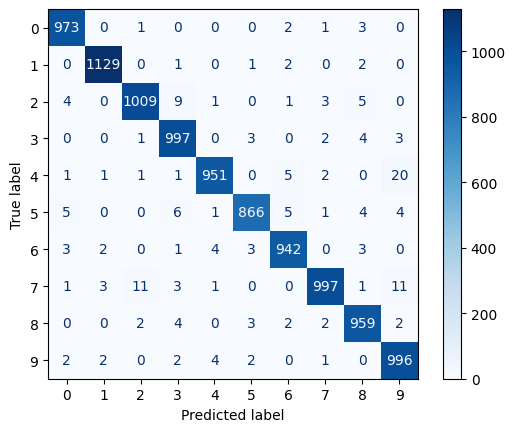

In [ ]:
y_predD = modelD.predict(x_test)
y_pred_classesD = np.argmax(y_predD,axis=1)
cmD = confusion_matrix(y_test,y_pred_classesD)
dispD = ConfusionMatrixDisplay(confusion_matrix=cmD)
dispD.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

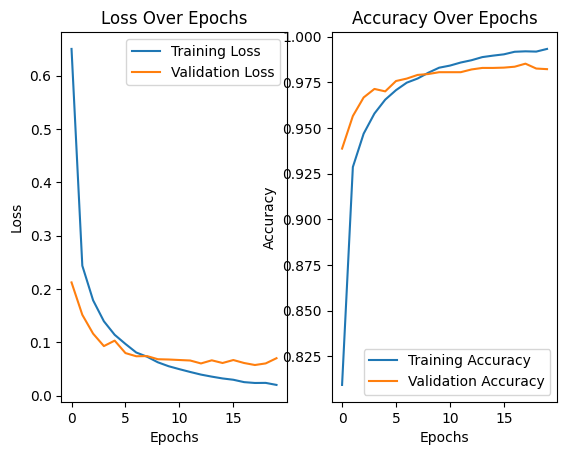

In [ ]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(historyD.history['loss'], label='Training Loss')
plt.plot(historyD.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(historyD.history['accuracy'], label='Training Accuracy')
plt.plot(historyD.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Le modèle converge bien sans signe évident d’overfitting.
Les courbes de loss et d’accuracy sont cohérentes et stables.

## 11) modèle (784 -> 500 -> 120-> 10, activation sigmoid) avec Dropout 50 epochs

### Entraînement du modèle

In [ ]:
historyD50 = modelD.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.1)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9933 - loss: 0.0191 - val_accuracy: 0.9820 - val_loss: 0.0685
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9867 - val_loss: 0.0555
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9937 - loss: 0.0182 - val_accuracy: 0.9838 - val_loss: 0.0683
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9958 - loss: 0.0139 - val_accuracy: 0.9845 - val_loss: 0.0644
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9949 - loss: 0.0139 - val_accuracy: 0.9855 - val_loss: 0.0631
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9965 - loss: 0.0115 - val_accuracy: 0.9845 - val_loss: 0.0700
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9953 - loss: 0.0137 - val_accuracy: 0.9838 - val_loss: 0.0663
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9957 - loss: 0.0124 - 

### Évaluation sur le test set

In [ ]:
lossD50, accD50 = modelD.evaluate(x_test, y_test)
print(f"ModelD test accuracy: {accD50:.4f}, test loss: {lossD50:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9809 - loss: 0.0980
ModelD test accuracy: 0.9848, test loss: 0.0757


## 12) modèle (784 -> 500 -> 120-> 10, activation LeakyReLU) avec Dropout et BatchNormalization


### Définition du modèle

In [ ]:
model11 = models.Sequential([
    layers.Flatten(input_shape=(28,28)),

    layers.Dense(784),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(500),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(120),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


### Fonction de coût et optimiseur

In [ ]:
model11.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Entraînement du modèle

In [ ]:
history11 = model11.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8854 - loss: 0.3770 - val_accuracy: 0.9693 - val_loss: 0.1011
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9648 - loss: 0.1143 - val_accuracy: 0.9792 - val_loss: 0.0720
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9741 - loss: 0.0809 - val_accuracy: 0.9755 - val_loss: 0.0861
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9790 - loss: 0.0644 - val_accuracy: 0.9827 - val_loss: 0.0654
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9829 - loss: 0.0538 - val_accuracy: 0.9797 - val_loss: 0.0689
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9852 - loss: 0.0463 - val_accuracy: 0.9820 - val_loss: 0.0660
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9863 - loss: 0.0425 - val_accuracy: 0.9828 - val_loss: 0.0656
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9872 - loss: 0.0371 - 

### Évaluation sur le test set

In [ ]:
loss11, acc11 = model11.evaluate(x_test, y_test)
print(f"Model11 test accuracy: {acc11:.4f}, test loss: {loss11:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9795 - loss: 0.0757
Model11 test accuracy: 0.9826, test loss: 0.0637


### **Protocole expérimental pour comparer la binarisation Otsu avec d’autres techniques de prétraitement (PCA, Data Augmentation)**

#### Objectif

Comparer l’impact de différents prétraitements d’images (binarisation d’Otsu, PCA et data augmentation) sur les performances d’un réseau de neurones appliqué à la classification des chiffres manuscrits (MNIST).

#### Étapes expérimentales

1. **Préparation du dataset**

   * Utilisation du même jeu de données (ex. : MNIST).
   * Division en trois ensembles identiques (train, validation, test).

2. **Prétraitements à comparer**

   * **Méthode 1 : Binarisation d’Otsu**
     → Convertir les images en niveaux de gris, puis appliquer le seuillage d’Otsu pour obtenir des images binaires (0/1).
   * **Méthode 2 : PCA (Principal Component Analysis)**
     → Réduire la dimensionnalité des images tout en conservant 95–98 % de la variance.
     → Reconstruire les images pour vérifier l’impact sur les performances.
   * **Méthode 3 : Data Augmentation**
     → Générer de nouvelles images par rotation, translation ou inversion légère pour enrichir le jeu d’entraînement.

3. **Architecture du modèle**

   * Utilisation du **même modèle de base** pour tous les tests (par ex. : 784–>500–>120–>10 avec sigmoid).
   * Même optimiseur (Adam), même taux d’apprentissage et même nombre d’époques.

4. **Expérimentation**

   * Entraînement du modèle séparément sur chaque version du dataset prétraité.
   * Mesurer pour chaque expérience :

     * L’évolution du **loss** et de l’**accuracy**.
     * La **vitesse de convergence**.
     * La **matrice de confusion** finale.

5. **Comparaison et analyse**

   * Comparaison les résultats selon :

     * La **performance globale (accuracy)**.
     * La **capacité de généralisation** (écart entre train et validation).

   * Discussion :

     * Si la binarisation améliore ou dégrade la reconnaissance.
     * Si la PCA réduit le bruit ou fait perdre des détails.
     * Si la data augmentation aide à éviter le surapprentissage.


## 13) Binarisation d'Otsu (784 -> 500 -> 120 -> 10, Sigmoid)

### Définition du modèle

In [29]:
modelOtsu2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(784, activation="sigmoid"),
    layers.Dense(784, activation="sigmoid"),
    layers.Dense(120, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fonction de coût et optimiseur

In [30]:
modelOtsu2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Entraînement du modèle

In [31]:
historyOtsu2 = modelOtsu2.fit(x_trainOtsu, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.1325 - loss: 2.2938 - val_accuracy: 0.3282 - val_loss: 1.8938
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.3401 - loss: 1.8440 - val_accuracy: 0.3943 - val_loss: 1.7162
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.3881 - loss: 1.7216 - val_accuracy: 0.4007 - val_loss: 1.6926
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.3936 - loss: 1.6980 - val_accuracy: 0.4103 - val_loss: 1.6636
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4036 - loss: 1.6700 - val_accuracy: 0.4105 - val_loss: 1.6502
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4085 - loss: 1.6525 - val_accuracy: 0.4085 - val_loss: 1.6513
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.4062 - loss: 1.6467 - val_accuracy: 0.4010 - val_loss: 1.6553
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4086 - loss: 1.6493 - 

### Évaluation sur le test set

In [32]:
lossOtsu2, accOtsu2 = modelOtsu2.evaluate(x_testOtsu, y_test)
print(f"ModelOtsu2 test accuracy: {accOtsu2:.4f}, test loss: {lossOtsu2:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3928 - loss: 1.6940
ModelOtsu2 test accuracy: 0.4107, test loss: 1.6381


### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


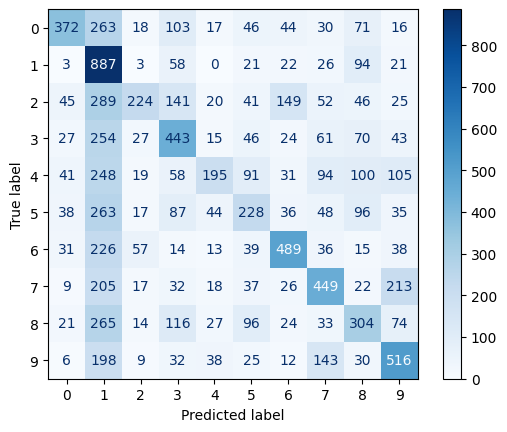

In [33]:
y_predOtsu2 = modelOtsu2.predict(x_testOtsu)
y_pred_classesOtsu2 = np.argmax(y_predOtsu2,axis=1)
cmOtsu2 = confusion_matrix(y_test,y_pred_classesOtsu2)
dispOtsu2 = ConfusionMatrixDisplay(confusion_matrix=cmOtsu2)
dispOtsu2.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

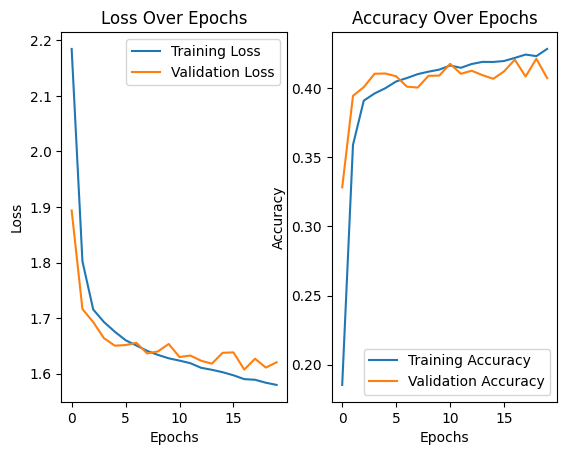

In [34]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(historyOtsu2.history['loss'], label='Training Loss')
plt.plot(historyOtsu2.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(historyOtsu2.history['accuracy'], label='Training Accuracy')
plt.plot(historyOtsu2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 14) PCA (784 -> 500 -> 120-> 10, Sigmoid)

La PCA (Analyse en Composantes Principales) est une méthode de réduction de dimensionnalité qui transforme les variables initiales en un ensemble de nouvelles variables orthogonales (les composantes principales).
Ces composantes conservent la plus grande partie de la variance des données, permettant ainsi de réduire la taille des images tout en conservant les informations essentielles.
Dans le contexte des réseaux de neurones, la PCA aide à réduire le bruit, accélérer l’apprentissage et éviter le surapprentissage.

### Reshape x_train et x_test

In [35]:
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat  = x_test.reshape(len(x_test), -1)
print("Shape flatten:", x_train_flat.shape, x_test_flat.shape)

Shape flatten: (60000, 784) (10000, 784)


### Application du PCA

In [36]:
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)
print("Shape après PCA:", x_train_pca.shape, x_test_pca.shape)

Shape après PCA: (60000, 100) (10000, 100)


### Définition du modèle

In [37]:
model_pca = models.Sequential([
    layers.Flatten(input_shape=(100,)),
    layers.Dense(784, activation="sigmoid"),
    layers.Dense(500, activation="sigmoid"),
    layers.Dense(120, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Fonction de coût et optimiseur

In [38]:
model_pca.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

### Entraînement du modèle

In [39]:
history_pca = model_pca.fit(x_train_pca, y_train, validation_split=0.1, epochs=20, batch_size=128)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5914 - loss: 1.3003 - val_accuracy: 0.9288 - val_loss: 0.2511
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9131 - loss: 0.2936 - val_accuracy: 0.9450 - val_loss: 0.1972
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9278 - loss: 0.2398 - val_accuracy: 0.9510 - val_loss: 0.1671
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9399 - loss: 0.1993 - val_accuracy: 0.9560 - val_loss: 0.1549
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9448 - loss: 0.1787 - val_accuracy: 0.9597 - val_loss: 0.1330
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9513 - loss: 0.1563 - val_accuracy: 0.9633 - val_loss: 0.1191
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9573 - loss: 0.1376 - val_accuracy: 0.9665 - val_loss: 0.1096
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9619 - loss: 0.1240 - val_acc

### Évaluation sur le test set

In [40]:
loss_pca, acc_pca = model_pca.evaluate(x_test_pca, y_test)
print(f"ModelPCA test accuracy: {acc_pca:.4f}, test loss: {loss_pca:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0940
ModelPCA test accuracy: 0.9746, test loss: 0.0829


### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


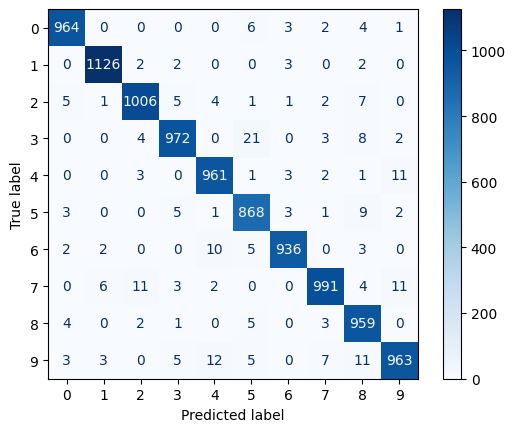

In [41]:
y_pred_pca = model_pca.predict(x_test_pca)
y_pred_classes_pca = np.argmax(y_pred_pca,axis=1)
cm_pca = confusion_matrix(y_test,y_pred_classes_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca)
disp_pca.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

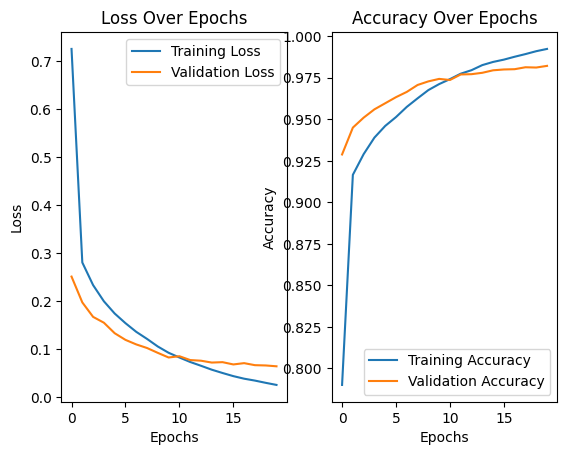

In [42]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history_pca.history['loss'], label='Training Loss')
plt.plot(history_pca.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history_pca.history['accuracy'], label='Training Accuracy')
plt.plot(history_pca.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 15) Data Augmentation (784 -> 500 -> 120, Sigmoid)

La Data Augmentation consiste à générer artificiellement de nouvelles images d’entraînement à partir des images existantes en appliquant des transformations comme la rotation, la translation, le zoom ou le retournement.
Cette technique permet d’augmenter la taille du dataset, de rendre le modèle plus robuste aux variations, et d’améliorer la capacité de généralisation du réseau.
Elle est particulièrement efficace pour éviter le surapprentissage sur des jeux de données limités.

In [43]:
x_train_ch = x_train.reshape(-1, 28, 28, 1)
x_test_ch  = x_test.reshape(-1, 28, 28, 1)

### Définition de Data Augmentation

In [44]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [45]:
datagen.fit(x_train_ch)

### Définition du modèle

In [46]:
modelAug = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(784, activation="sigmoid"),
    layers.Dense(500, activation="sigmoid"),
    layers.Dense(120, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

### Fonction coût et optimiseur

In [47]:
modelAug.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

### Entraînement du modèle

In [48]:
historyAug = modelAug.fit(
    datagen.flow(x_train_ch, y_train, batch_size=128),
    validation_data=(x_test_ch, y_test),
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.4727 - loss: 1.5361 - val_accuracy: 0.9031 - val_loss: 0.3620
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.8480 - loss: 0.4975 - val_accuracy: 0.9469 - val_loss: 0.1776
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9166 - loss: 0.2706 - val_accuracy: 0.9603 - val_loss: 0.1262
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9339 - loss: 0.2098 - val_accuracy: 0.9675 - val_loss: 0.1008
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9438 - loss: 0.1754 - val_accuracy: 0.9712 - val_loss: 0.0896
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9531 - loss: 0.1482 - val_accuracy: 0.9743 - val_loss: 0.0814
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9582 - loss: 0.1326 - val_accuracy: 0.9761 - val_loss: 0.0709
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9597 - loss: 0.1247 - val_accurac

### Évaluation sur le test set

In [49]:
lossAug, accAug = modelAug.evaluate(x_test_ch, y_test)
print(f"ModelAug test accuracy: {accAug:.4f}, test loss: {lossAug:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9834 - loss: 0.0475
ModelAug test accuracy: 0.9858, test loss: 0.0390


### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


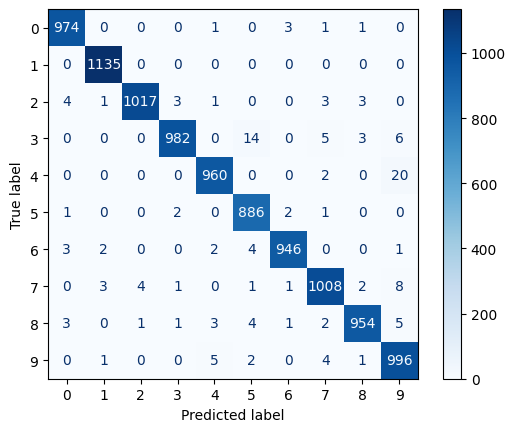

In [51]:
y_predAug = modelAug.predict(x_test)
y_pred_classesAug = np.argmax(y_predAug,axis=1)
cmAug = confusion_matrix(y_test,y_pred_classesAug)
dispAug = ConfusionMatrixDisplay(confusion_matrix=cmAug)
dispAug.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

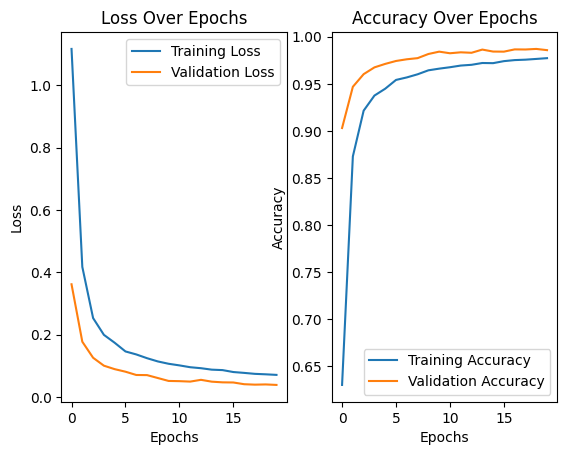

In [52]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(historyAug.history['loss'], label='Training Loss')
plt.plot(historyAug.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(historyAug.history['accuracy'], label='Training Accuracy')
plt.plot(historyAug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### **Comparaison globale**
### **1. Binarisation d’Otsu**
* **Accuracy entraînement :** ≈ 0.42
* **Accuracy validation :** ≈ 0.41
* **Test accuracy :** 0.4107
* **Test loss :** 1.6381

**Analyse :**
Les performances sont faibles. La binarisation a réduit la richesse visuelle des images et supprimé des informations utiles à la distinction des chiffres. Le modèle a donc **mal convergé** et montre une **sous-apprentissage important**.


### **2. PCA**
* **Accuracy entraînement :** jusqu’à ≈ 0.99
* **Accuracy validation :** ≈ 0.98
* **Test accuracy :** 0.9746
* **Test loss :** 0.0829

**Analyse :**
Le modèle converge rapidement avec une précision très élevée et une perte faible. La PCA améliore la **vitesse d’apprentissage** et la **stabilité de la généralisation** tout en éliminant une partie du bruit des images originales.

### **3. Data Augmentation**
* **Accuracy entraînement :** ≈ 0.98
* **Accuracy validation :** ≈ 0.99
* **Test accuracy :** 0.9858
* **Test loss :** 0.0390

**Analyse :**
Cette méthode offre les **meilleurs résultats** parmi les trois. L’augmentation des données a permis au modèle d’être plus robuste face aux variations et de mieux généraliser. Le modèle converge rapidement vers une **précision supérieure à 98%** avec une très faible perte.

### **Conclusion**

Le protocole expérimental montre que :

* La **binarisation d’Otsu** réduit trop l’information utile → performances faibles.
* La **PCA** apporte une amélioration notable en filtrant le bruit et accélérant l’apprentissage.
* La **Data Augmentation** est la méthode la plus efficace pour **augmenter la précision et la généralisation**, atteignant **98,5% d’accuracy**.


## 16) Data Augmentation modèle (512 -> 256 -> 10, activation: ReLU)

### Définition du modèle

In [ ]:
model_aug = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### Fonction de coût et optimiseur

In [ ]:
model_aug.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

### Entraînement du modèle

In [ ]:
history_aug = model_aug.fit(
    datagen.flow(x_train_ch, y_train, batch_size=128),
    validation_data=(x_test_ch, y_test),
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.7440 - loss: 0.8038 - val_accuracy: 0.9624 - val_loss: 0.1249
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9366 - loss: 0.2128 - val_accuracy: 0.9750 - val_loss: 0.0785
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9510 - loss: 0.1634 - val_accuracy: 0.9764 - val_loss: 0.0782
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9595 - loss: 0.1329 - val_accuracy: 0.9801 - val_loss: 0.0611
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9627 - loss: 0.1204 - val_accuracy: 0.9824 - val_loss: 0.0527
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9671 - loss: 0.1046 - val_accuracy: 0.9791 - val_loss: 0.0591
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9681 - loss: 0.1032 - val_accuracy: 0.9824 - val_loss: 0.0554
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9712 - loss: 0.0928 - val_accurac

### Évaluation sur le test set

In [ ]:
loss_aug, acc_aug = model_aug.evaluate(x_test_ch, y_test)
print(f"Model data augmentation test accuracy: {acc_aug:.4f}, test loss: {loss_aug:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9855 - loss: 0.0480
Model data augmentation test accuracy: 0.9873, test loss: 0.0409


## 17) Data Augmentation, Sigmoid, Dropout et Normalisation


### Définition du modèle

In [ ]:
model_aug2 = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(784, activation="sigmoid"),
    layers.Dropout(0.3),
    layers.Dense(500, activation="sigmoid"),
    layers.Dropout(0.3),
    layers.Dense(120, activation="sigmoid"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

### Fonction de coût et optimiseur

In [ ]:
model_aug2.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

### Entraînement du modèle

In [ ]:
history_aug2 = model_aug2.fit(
    datagen.flow(x_train_ch, y_train, batch_size=128),
    validation_data=(x_test_ch, y_test),
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - accuracy: 0.3949 - loss: 1.7182 - val_accuracy: 0.8978 - val_loss: 0.3883
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.7957 - loss: 0.6521 - val_accuracy: 0.9430 - val_loss: 0.1947
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8757 - loss: 0.4068 - val_accuracy: 0.9567 - val_loss: 0.1470
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9038 - loss: 0.3113 - val_accuracy: 0.9641 - val_loss: 0.1158
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9176 - loss: 0.2706 - val_accuracy: 0.9670 - val_loss: 0.1063
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9248 - loss: 0.2423 - val_accuracy: 0.9699 - val_loss: 0.0945
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9320 - loss: 0.2217 - val_accuracy: 0.9728 - val_loss: 0.0828
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9390 - loss: 0.1990 - val_accurac

### Évaluation sur le test set

In [ ]:
loss_aug2, acc_aug2 = model_aug2.evaluate(x_test_ch, y_test)
print(f"Model data augmentation2 test accuracy: {acc_aug2:.4f}, test loss: {loss_aug2:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0481
Model data augmentation2 test accuracy: 0.9862, test loss: 0.0427


## 18) Data Augmentation, ReLU, Dropout et callback

### Définition du modèle

In [ ]:
model_aug3 = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

### Fonction de coût et optimiseur

In [ ]:
model_aug3.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Application des callback

**Un callback** est un objet qui permet de surveiller et contrôler automatiquement le processus d’entraînement d’un modèle. Il peut intervenir à la fin de chaque epoch ou batch pour réaliser des actions spécifiques, comme ajuster le learning rate, arrêter l’entraînement en cas de stagnation, sauvegarder le modèle, ou afficher des informations.

*ReduceLROnPlateau* : réduit automatiquement le taux d’apprentissage si le modèle stagne, pour favoriser une convergence plus fine.

*EarlyStopping* : arrête l’entraînement si la performance sur les données de validation ne s’améliore plus, afin d’éviter le sur-apprentissage.

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


### Entraînement du modèle

In [ ]:
history_aug3 = model_aug3.fit(
    datagen.flow(x_train_ch, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test_ch, y_test),
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - accuracy: 0.7149 - loss: 0.8574 - val_accuracy: 0.9600 - val_loss: 0.1252 - learning_rate: 0.0010
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9120 - loss: 0.2893 - val_accuracy: 0.9700 - val_loss: 0.0995 - learning_rate: 0.0010
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9285 - loss: 0.2348 - val_accuracy: 0.9739 - val_loss: 0.0840 - learning_rate: 0.0010
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9342 - loss: 0.2139 - val_accuracy: 0.9692 - val_loss: 0.0914 - learning_rate: 0.0010
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9394 - loss: 0.1984 - val_accuracy: 0.9768 - val_loss: 0.0668 - learning_rate: 0.0010
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9455 - loss: 0.1775 - val_accuracy: 0.9766 - val_loss: 0.0734 - learning_rate: 0.0010
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9482 - loss: 0.1737

### Évaluation sur le test set

In [ ]:
loss_aug3, acc_aug3 = model_aug3.evaluate(x_test_ch, y_test, verbose=2)
print(f"Model data augmentation3 test accuracy: {acc_aug3:.4f}, test loss: {loss_aug3:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9913 - loss: 0.0288
Model data augmentation3 test accuracy: 0.9913, test loss: 0.0288


Le modèle *data augmentation 3* est un MLP avec trois couches denses de 1024, 512 et 256 neurones utilisant l’activation ReLU et un dropout de 0,3 pour limiter le sur-apprentissage. Les images d’entraînement ont été augmentées par rotation, translation, zoom et légère déformation pour améliorer la robustesse du modèle. L’entraînement a utilisé l’optimiseur Adam et les callbacks ReduceLROnPlateau et EarlyStopping pour ajuster le learning rate et stopper l’entraînement si nécessaire. Cette combinaison a permis d’atteindre une accuracy de test de **99,18 %** avec une loss de **0,0281** sur MNIST.

### Matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


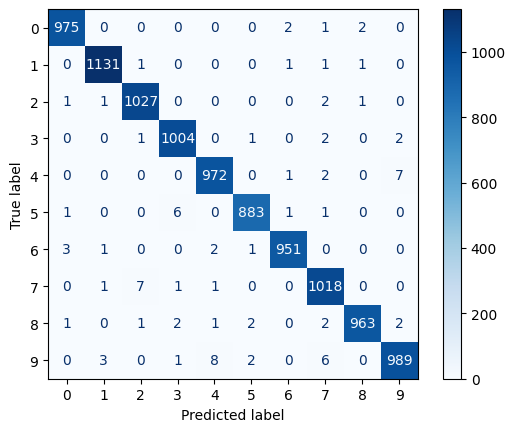

In [ ]:
y_pred_aug3 = model_aug3.predict(x_test)
y_pred_classes_aug3 = np.argmax(y_pred_aug3,axis=1)
cm_aug3 = confusion_matrix(y_test,y_pred_classes_aug3)
disp_aug3 = ConfusionMatrixDisplay(confusion_matrix=cm_aug3)
disp_aug3.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

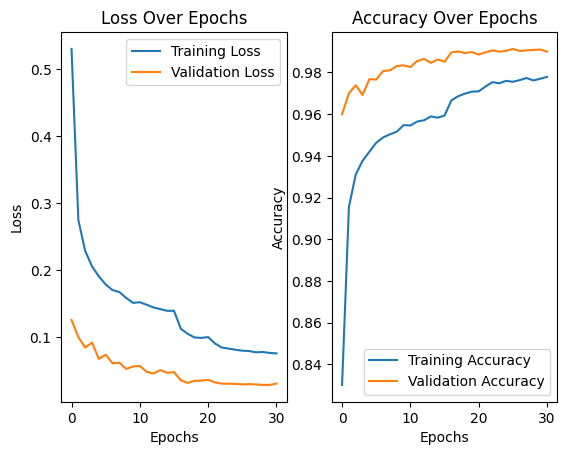

In [ ]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history_aug3.history['loss'], label='Training Loss')
plt.plot(history_aug3.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history_aug3.history['accuracy'], label='Training Accuracy')
plt.plot(history_aug3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Les courbes ne montrent aucun signe de surapprentissage.

# Partie 2 : Utilisation de Pytorch

## 1) importation des bibliothèques

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

## 2) Chagrement des données

In [3]:
transform = transforms.Compose([transforms.ToTensor(),])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.45MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 158kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.54MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 640kB/s]


## 3) Chagrement des données Séparation du train et validation

In [4]:
val_size = int(0.1 * len(train_dataset))
train_size = len(train_dataset) - val_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

## 4) DataLoaders

In [5]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

## 5) modèle 1 (784 -> 120-> 10, activation sigmoid)



### Définition du modèle

In [ ]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 784)
        self.act1 = nn.Sigmoid()
        self.fc2 = nn.Linear(784, 120)
        self.act2 = nn.Sigmoid()
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        x = self.fc3(x)
        return x

model = Model1()

### Fonction de coût et optimiseur

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

### Fonctions d'entraînement et de validation

In [11]:
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for xb, yb in loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * xb.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == yb).sum().item()
        total += yb.size(0)
    return running_loss / total, correct / total

def eval_epoch(model, loader, criterion):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for xb, yb in loader:
            outputs = model(xb)
            loss = criterion(outputs, yb)
            running_loss += loss.item() * xb.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == yb).sum().item()
            total += yb.size(0)
    return running_loss / total, correct / total

### Entraînement du modèle

In [ ]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc = eval_epoch(model, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | "f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "  f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

Epoch 1/20 | Train Loss: 0.1085 | Val Loss: 0.1176 | Train Acc: 0.9686 | Val Acc: 0.9667
Epoch 2/20 | Train Loss: 0.0847 | Val Loss: 0.1043 | Train Acc: 0.9756 | Val Acc: 0.9685
Epoch 3/20 | Train Loss: 0.0670 | Val Loss: 0.0885 | Train Acc: 0.9796 | Val Acc: 0.9742
Epoch 4/20 | Train Loss: 0.0540 | Val Loss: 0.0929 | Train Acc: 0.9842 | Val Acc: 0.9722
Epoch 5/20 | Train Loss: 0.0448 | Val Loss: 0.0862 | Train Acc: 0.9867 | Val Acc: 0.9738
Epoch 6/20 | Train Loss: 0.0349 | Val Loss: 0.0788 | Train Acc: 0.9902 | Val Acc: 0.9767
Epoch 7/20 | Train Loss: 0.0276 | Val Loss: 0.0787 | Train Acc: 0.9925 | Val Acc: 0.9773
Epoch 8/20 | Train Loss: 0.0224 | Val Loss: 0.0781 | Train Acc: 0.9940 | Val Acc: 0.9765
Epoch 9/20 | Train Loss: 0.0174 | Val Loss: 0.0749 | Train Acc: 0.9958 | Val Acc: 0.9782
Epoch 10/20 | Train Loss: 0.0137 | Val Loss: 0.0733 | Train Acc: 0.9970 | Val Acc: 0.9793
Epoch 11/20 | Train Loss: 0.0116 | Val Loss: 0.0792 | Train Acc: 0.9974 | Val Acc: 0.9770
Epoch 12/20 | Train

### Évaluation sur le test set

In [ ]:
model.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(model, test_loader, criterion)

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = model(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModel1 test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


Model1 test accuracy: 0.9794, test loss: 0.0877


### Matrice de confusion

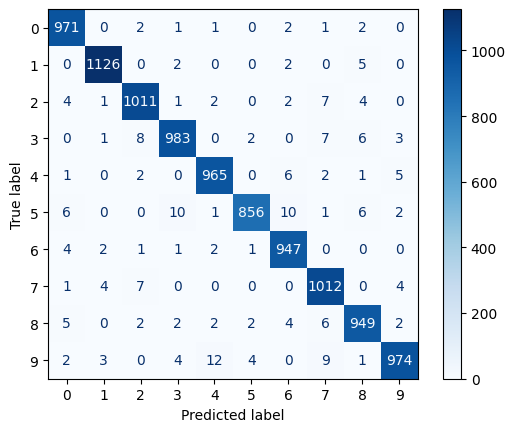

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

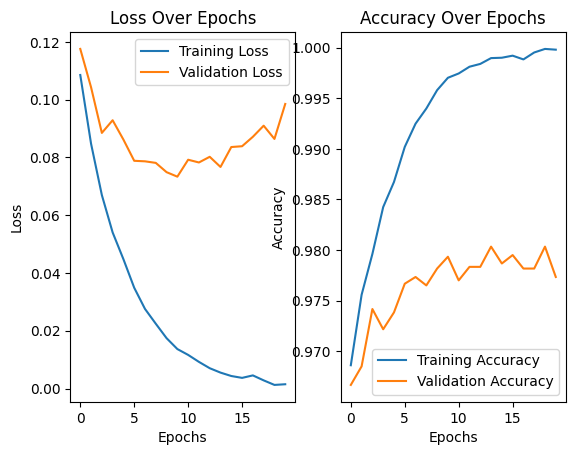

In [ ]:
# Perte
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Précision
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Les courbes de loss et d’accuracy de validation ne sont pas stables.

## 6) modèle 2 (784 -> 120-> 10, activation ReLU)

### Définition du modèle

In [ ]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 784)
        self.fc2 = nn.Linear(784, 120)
        self.fc3 = nn.Linear(120, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model2 = Model2()

### Fonction de coût et optimiseur

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters())

### Entraînement du modèle

In [ ]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model2, train_loader, optimizer, criterion)
    val_loss, val_acc = eval_epoch(model2, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f} , val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")

Epoch 1/20, train loss: 0.1340 , val loss: 0.1112, train acc: 0.9596, val acc: 0.9648
Epoch 2/20, train loss: 0.0780 , val loss: 0.0806, train acc: 0.9761, val acc: 0.9752
Epoch 3/20, train loss: 0.0548 , val loss: 0.0791, train acc: 0.9830, val acc: 0.9758
Epoch 4/20, train loss: 0.0389 , val loss: 0.0788, train acc: 0.9883, val acc: 0.9765
Epoch 5/20, train loss: 0.0298 , val loss: 0.0796, train acc: 0.9908, val acc: 0.9790
Epoch 6/20, train loss: 0.0226 , val loss: 0.1027, train acc: 0.9931, val acc: 0.9727
Epoch 7/20, train loss: 0.0166 , val loss: 0.0854, train acc: 0.9948, val acc: 0.9785
Epoch 8/20, train loss: 0.0156 , val loss: 0.0918, train acc: 0.9950, val acc: 0.9758
Epoch 9/20, train loss: 0.0165 , val loss: 0.0944, train acc: 0.9946, val acc: 0.9765
Epoch 10/20, train loss: 0.0120 , val loss: 0.0951, train acc: 0.9958, val acc: 0.9785
Epoch 11/20, train loss: 0.0084 , val loss: 0.0935, train acc: 0.9971, val acc: 0.9795
Epoch 12/20, train loss: 0.0111 , val loss: 0.0967, 

### Évaluation sur le test set

In [ ]:
model2.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(model2, test_loader, criterion)

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = model2(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModel2 test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


Model2 test accuracy: 0.9812, test loss: 0.0984


### Matrice de confusion

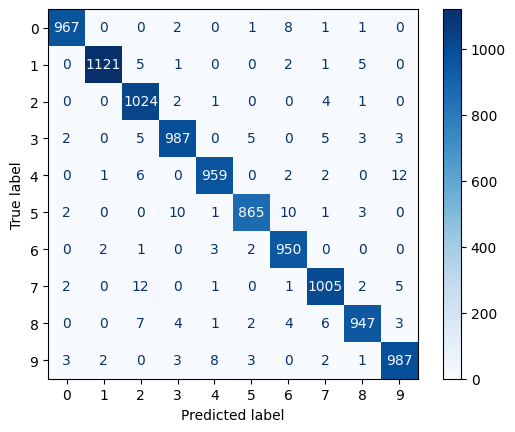

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

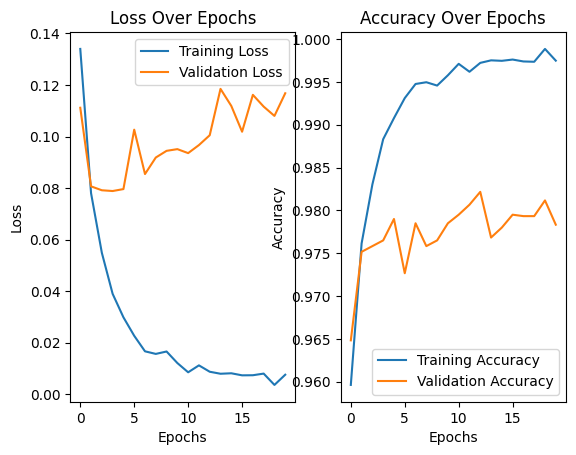

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Les courbes d’apprentissage montrent que le modèle converge rapidement : la perte d’entraînement diminue continuellement et la précision atteint presque 99.8 %.
La perte de validation et l’accuracy de validation se stabilise présentent
des fluctuations  à partir de l’epoch 4 suggèrent un léger surapprentissage.

## 7) modèle 3.b (784 -> 500 -> 120-> 10, activation sigmoid)



### Définition du modèle

In [ ]:
class Model3B(nn.Module):
    def __init__(self):
        super(Model3B, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 784)
        self.fc2 = nn.Linear(784, 500)
        self.fc3 = nn.Linear(500, 120)
        self.fc4 = nn.Linear(120, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

model3B = Model3B()

### Fonction de coût et optimiseur

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3B.parameters())

### Entraînement du modèle

In [ ]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model3B, train_loader, optimizer, criterion)
    val_loss, val_acc = eval_epoch(model3B, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f} , val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")

Epoch 1/20, train loss: 1.9045 , val loss: 1.6816, train acc: 0.5659, val acc: 0.7962
Epoch 2/20, train loss: 1.6062 , val loss: 1.5484, train acc: 0.8630, val acc: 0.9175
Epoch 3/20, train loss: 1.5364 , val loss: 1.5257, train acc: 0.9268, val acc: 0.9372
Epoch 4/20, train loss: 1.5193 , val loss: 1.5172, train acc: 0.9437, val acc: 0.9455
Epoch 5/20, train loss: 1.5098 , val loss: 1.5176, train acc: 0.9531, val acc: 0.9452
Epoch 6/20, train loss: 1.5032 , val loss: 1.5099, train acc: 0.9590, val acc: 0.9517
Epoch 7/20, train loss: 1.4981 , val loss: 1.5034, train acc: 0.9641, val acc: 0.9585
Epoch 8/20, train loss: 1.4933 , val loss: 1.5009, train acc: 0.9688, val acc: 0.9613
Epoch 9/20, train loss: 1.4912 , val loss: 1.5010, train acc: 0.9708, val acc: 0.9603
Epoch 10/20, train loss: 1.4877 , val loss: 1.4990, train acc: 0.9741, val acc: 0.9625
Epoch 11/20, train loss: 1.4856 , val loss: 1.4975, train acc: 0.9766, val acc: 0.9635
Epoch 12/20, train loss: 1.4845 , val loss: 1.4988, 

### Évaluation sur le test set

In [ ]:
model3B.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(model3B, test_loader, criterion)

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = model3B(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModel3B test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


Model3B test accuracy: 0.9745, test loss: 1.4873


### Matrice de confusion

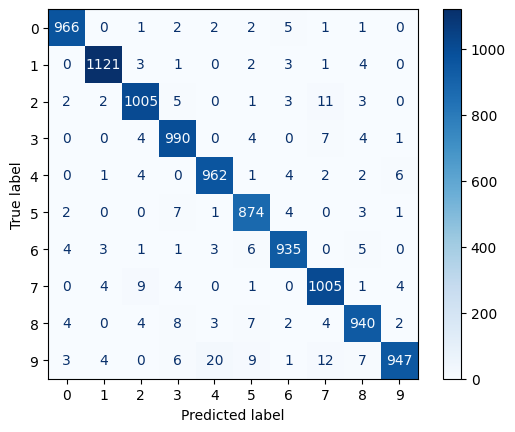

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

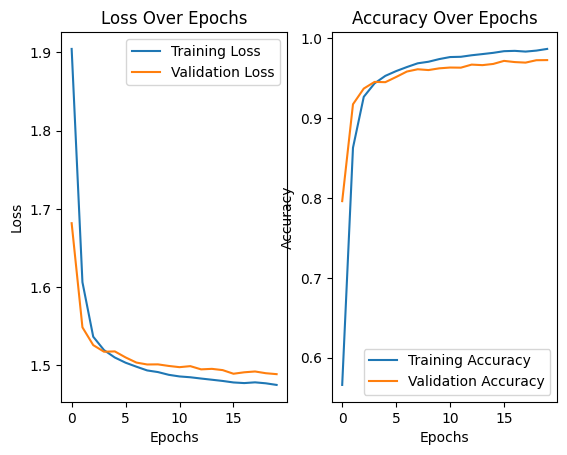

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Les courbes montrent une diminution rapide de la perte et une augmentation significative de la précision dès les premières époques, jusqu’à atteindre une stabilisation autour de 97 %. La proximité entre les courbes d’entraînement et de validation indique une bonne généralisation du modèle, sans surapprentissage notable. Le modèle est donc bien entraîné et performant.

## 8) modèle 3.c (784 -> 500 -> 120-> 10, activation ReLU)

### Définition du modèle

In [ ]:
class Model3C(nn.Module):
    def __init__(self):
        super(Model3C, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 784)
        self.fc2 = nn.Linear(784, 500)
        self.fc3 = nn.Linear(500, 120)
        self.fc4 = nn.Linear(120, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

model3C = Model3C()

### Fonction de coût et optimiseur

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3C.parameters())

### Entraînement du modèle

In [ ]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model3C, train_loader, optimizer, criterion)
    val_loss, val_acc = eval_epoch(model3C, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch}/{num_epochs}, train loss: {train_loss:.4f} , val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")

Epoch 0/20, train loss: 1.6522 , val loss: 1.5597, train acc: 0.8145, val acc: 0.9037
Epoch 1/20, train loss: 1.5188 , val loss: 1.5139, train acc: 0.9440, val acc: 0.9468
Epoch 2/20, train loss: 1.5024 , val loss: 1.5020, train acc: 0.9593, val acc: 0.9592
Epoch 3/20, train loss: 1.4942 , val loss: 1.4952, train acc: 0.9673, val acc: 0.9658
Epoch 4/20, train loss: 1.4903 , val loss: 1.4974, train acc: 0.9710, val acc: 0.9637
Epoch 5/20, train loss: 1.4890 , val loss: 1.4959, train acc: 0.9721, val acc: 0.9647
Epoch 6/20, train loss: 1.4874 , val loss: 1.4938, train acc: 0.9740, val acc: 0.9673
Epoch 7/20, train loss: 1.4853 , val loss: 1.4943, train acc: 0.9757, val acc: 0.9673
Epoch 8/20, train loss: 1.4841 , val loss: 1.4908, train acc: 0.9771, val acc: 0.9702
Epoch 9/20, train loss: 1.4807 , val loss: 1.4963, train acc: 0.9805, val acc: 0.9647
Epoch 10/20, train loss: 1.4827 , val loss: 1.4926, train acc: 0.9784, val acc: 0.9680
Epoch 11/20, train loss: 1.4826 , val loss: 1.4907, t

### Évaluation sur le test set

In [ ]:
model3C.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(model3C, test_loader, criterion)

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = model3C(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModel3C test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


Model3C test accuracy: 0.9677, test loss: 1.4935


### Matrice de confusion

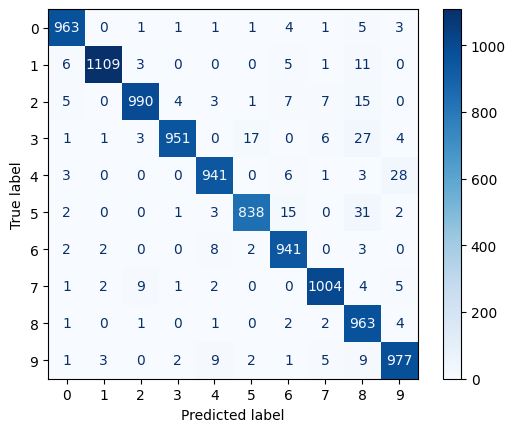

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

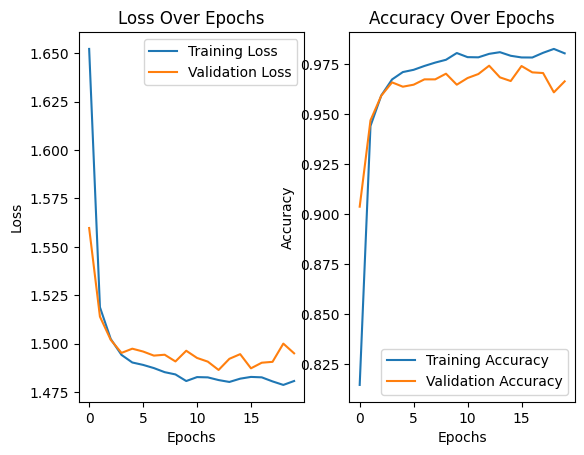

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Le modèle converge même qu'ils existent quelques fluctions mineurs sans signe évident d’overfitting.
Les courbes de loss et d’accuracy sont cohérentes.

## 9) Binarisation par Otsu

### Charger MNIST original

In [ ]:
transform = transforms.ToTensor()
train_dataset_full = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset_full  = torchvision.datasets.MNIST(root='./data', train=False, download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.09MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.61MB/s]


### Convertir le dataset en numpy pour appliquer Otsu

In [ ]:
x_train = train_dataset_full.data.numpy().astype("float32") / 255.0
y_train = train_dataset_full.targets.numpy()
x_test  = test_dataset_full.data.numpy().astype("float32") / 255.0
y_test  = test_dataset_full.targets.numpy()


In [ ]:
x_trainOtsu = apply_otsu(x_train)
x_testOtsu  = apply_otsu(x_test)

### Préparation de DataLoader pour Otsu

In [ ]:
train_dataset_otsu = TensorDataset(torch.tensor(x_trainOtsu).unsqueeze(1), torch.tensor(y_train))
test_dataset_otsu  = TensorDataset(torch.tensor(x_testOtsu).unsqueeze(1), torch.tensor(y_test))

In [ ]:
val_size = int(0.1 * len(train_dataset_otsu))
train_size = len(train_dataset_otsu) - val_size
train_dataset_otsu, val_dataset_otsu = random_split(train_dataset_otsu, [train_size, val_size])

train_loader = DataLoader(train_dataset_otsu, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_dataset_otsu, batch_size=128)
test_loader  = DataLoader(test_dataset_otsu, batch_size=128)

### Définition du modèle

In [ ]:
class ModelOtsu(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 784)
        self.fc2 = nn.Linear(784, 120)
        self.fc3 = nn.Linear(120, 10)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.flatten(x)
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

modelOtsu = ModelOtsu()

### Fonction coût et optimizers

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelOtsu.parameters(), lr=0.001)

### Entraînement du modèle

In [ ]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(modelOtsu, train_loader, optimizer, criterion)
    val_loss, val_acc = eval_epoch(modelOtsu, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f} , val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")

Epoch 1/20, train loss: 2.1692 , val loss: 1.8935, train acc: 0.2094, val acc: 0.3262
Epoch 2/20, train loss: 1.7847 , val loss: 1.7464, train acc: 0.3706, val acc: 0.3750
Epoch 3/20, train loss: 1.7021 , val loss: 1.6886, train acc: 0.3958, val acc: 0.3907
Epoch 4/20, train loss: 1.6693 , val loss: 1.6851, train acc: 0.4050, val acc: 0.3972
Epoch 5/20, train loss: 1.6529 , val loss: 1.6920, train acc: 0.4067, val acc: 0.3898
Epoch 6/20, train loss: 1.6409 , val loss: 1.6640, train acc: 0.4094, val acc: 0.3998
Epoch 7/20, train loss: 1.6304 , val loss: 1.6628, train acc: 0.4129, val acc: 0.4025
Epoch 8/20, train loss: 1.6252 , val loss: 1.6485, train acc: 0.4130, val acc: 0.4055
Epoch 9/20, train loss: 1.6184 , val loss: 1.6458, train acc: 0.4145, val acc: 0.4092
Epoch 10/20, train loss: 1.6119 , val loss: 1.6547, train acc: 0.4161, val acc: 0.4022
Epoch 11/20, train loss: 1.6093 , val loss: 1.6554, train acc: 0.4175, val acc: 0.4015
Epoch 12/20, train loss: 1.6053 , val loss: 1.6508, 

### Evaluation sur test set

In [ ]:
modelOtsu.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(modelOtsu, test_loader, criterion)

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = modelOtsu(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModelOtsu test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


ModelOtsu test accuracy: 0.4088, test loss: 1.6434


### Matrice de confusion

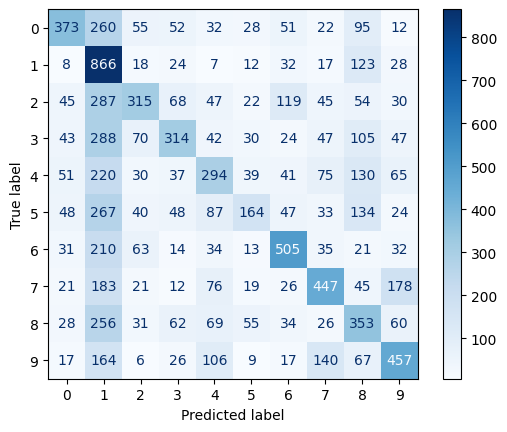

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accurarcy

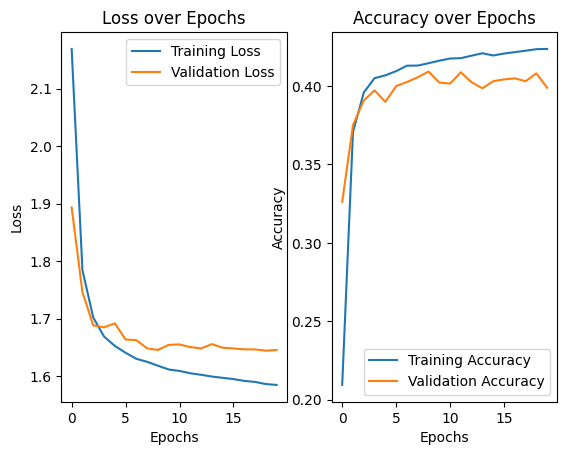

In [ ]:
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Les courbes d’apprentissage montrent un sous-apprentissage marqué : la perte d’entraînement reste élevée et la précision stagne autour de 42 %, tandis que la précision de validation atteint seulement 40 %.
La faible performance sur le jeu de test (accuracy = 40.88 %, loss = 1.6434) confirme que le modèle est incapable de généraliser.
Ce comportement est typique d’un modèle trop simple ou mal adapté aux données.

## 10) modèle (784 -> 500 -> 120-> 10, activation sigmoid) avec l'optimiseur RMSProp

### Définition du modèle

In [ ]:
class MLP_RMS(nn.Module):
    def __init__(self):
        super(MLP_RMS, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 784)
        self.fc2 = nn.Linear(784, 500)
        self.fc3 = nn.Linear(500, 120)
        self.fc4 = nn.Linear(120, 10)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.flatten(x)
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

modelR = MLP_RMS()

### Fonction de coût et optimiseur

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(modelR.parameters())

### Entraînement du modèle

In [ ]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(modelR, train_loader, optimizer, criterion)
    val_loss, val_acc = eval_epoch(modelR, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f} , val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")

Epoch 1/20, train loss: 2.3937 , val loss: 2.4005, train acc: 0.1019, val acc: 0.1002
Epoch 2/20, train loss: 2.3571 , val loss: 2.3727, train acc: 0.1013, val acc: 0.1110
Epoch 3/20, train loss: 2.3571 , val loss: 2.4286, train acc: 0.1014, val acc: 0.1005
Epoch 4/20, train loss: 2.3568 , val loss: 2.3511, train acc: 0.1003, val acc: 0.1110
Epoch 5/20, train loss: 2.3581 , val loss: 2.3671, train acc: 0.1004, val acc: 0.1067
Epoch 6/20, train loss: 2.3577 , val loss: 2.3381, train acc: 0.1030, val acc: 0.0967
Epoch 7/20, train loss: 2.3589 , val loss: 2.3282, train acc: 0.0983, val acc: 0.0973
Epoch 8/20, train loss: 2.3567 , val loss: 2.3536, train acc: 0.1022, val acc: 0.0890
Epoch 9/20, train loss: 2.3578 , val loss: 2.3500, train acc: 0.1005, val acc: 0.0973
Epoch 10/20, train loss: 2.3608 , val loss: 2.3992, train acc: 0.0981, val acc: 0.1005
Epoch 11/20, train loss: 2.3555 , val loss: 2.3549, train acc: 0.1024, val acc: 0.1013
Epoch 12/20, train loss: 2.3581 , val loss: 2.3984, 

### Évaluation sur le test set

In [ ]:
modelR.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(modelR, test_loader, criterion)

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = modelR(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModelR test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


ModelR test accuracy: 0.1135, test loss: 2.3348


## 11) modèle 3.b (784 -> 500 -> 120-> 10, activation LeakyReLU)

### Définition du modèle

In [ ]:
class ModelL(nn.Module):
    def __init__(self):
        super(ModelL, self).__init__()
        self.fc1 = nn.Linear(28*28, 784)
        self.fc2 = nn.Linear(784, 500)
        self.fc3 = nn.Linear(500, 120)
        self.fc4 = nn.Linear(120, 10)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.leakyrelu(self.fc3(x))
        x = self.fc4(x)
        return x

modelL = ModelL()

### Fonction coût et optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelL.parameters(), lr=0.001)

### Entraînement du modèle

In [ ]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(modelL, train_loader, optimizer, criterion)
    val_loss, val_acc = eval_epoch(modelL, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f} , val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")

Epoch 1/20, train loss: 0.2937 , val loss: 0.1381, train acc: 0.9114, val acc: 0.9590
Epoch 2/20, train loss: 0.1044 , val loss: 0.1012, train acc: 0.9674, val acc: 0.9697
Epoch 3/20, train loss: 0.0646 , val loss: 0.0939, train acc: 0.9809, val acc: 0.9718
Epoch 4/20, train loss: 0.0491 , val loss: 0.0883, train acc: 0.9845, val acc: 0.9740
Epoch 5/20, train loss: 0.0364 , val loss: 0.0889, train acc: 0.9886, val acc: 0.9762
Epoch 6/20, train loss: 0.0274 , val loss: 0.0806, train acc: 0.9910, val acc: 0.9777
Epoch 7/20, train loss: 0.0253 , val loss: 0.0914, train acc: 0.9921, val acc: 0.9757
Epoch 8/20, train loss: 0.0217 , val loss: 0.0826, train acc: 0.9930, val acc: 0.9750
Epoch 9/20, train loss: 0.0191 , val loss: 0.0901, train acc: 0.9936, val acc: 0.9783
Epoch 10/20, train loss: 0.0152 , val loss: 0.0847, train acc: 0.9951, val acc: 0.9800
Epoch 11/20, train loss: 0.0166 , val loss: 0.0812, train acc: 0.9945, val acc: 0.9805
Epoch 12/20, train loss: 0.0116 , val loss: 0.0883, 

### Evaluation sur le test set

In [ ]:
modelL.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(modelL, test_loader, criterion)

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = modelL(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModelL test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


ModelL test accuracy: 0.9787, test loss: 0.1112


### Matrice de confusion

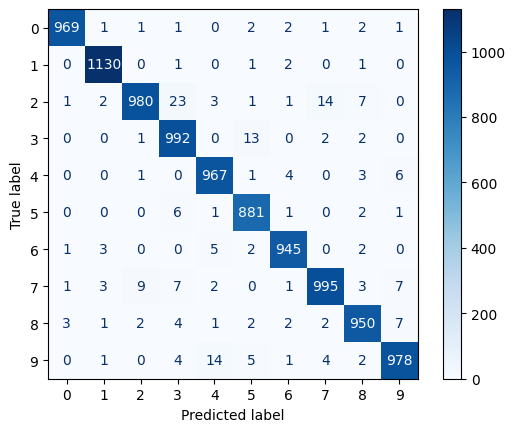

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

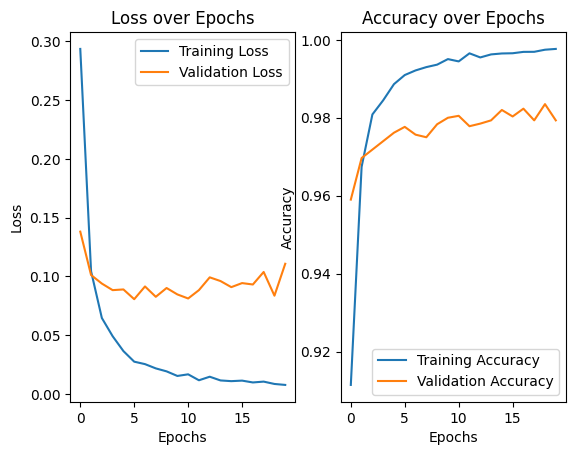

In [ ]:
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Les courbes de loss et d’accuracy (train et val) ne converge pas entre eux.

## 12) modèle (784 -> 500 -> 120-> 10, activation sigmoid) avec Dropout

### Définition du modèle

In [ ]:
class ModelD(nn.Module):
    def __init__(self):
        super(ModelD, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 784)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(784, 500)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(500, 120)
        self.fc4 = nn.Linear(120, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.sigmoid(self.fc1(x))
        x = self.dropout1(x)
        x = self.sigmoid(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

modelD = ModelD()

### Fonction de coût et optimiseur

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelD.parameters())

### Entraînement du modèle

In [ ]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(modelD, train_loader, optimizer, criterion)
    val_loss, val_acc = eval_epoch(modelD, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f} , val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")

Epoch 1/20, train loss: 1.8720 , val loss: 1.7116, train acc: 0.5979, val acc: 0.7528
Epoch 2/20, train loss: 1.6313 , val loss: 1.5562, train acc: 0.8379, val acc: 0.9113
Epoch 3/20, train loss: 1.5427 , val loss: 1.5235, train acc: 0.9227, val acc: 0.9400
Epoch 4/20, train loss: 1.5248 , val loss: 1.5138, train acc: 0.9385, val acc: 0.9483
Epoch 5/20, train loss: 1.5139 , val loss: 1.5076, train acc: 0.9496, val acc: 0.9543
Epoch 6/20, train loss: 1.5083 , val loss: 1.5017, train acc: 0.9545, val acc: 0.9602
Epoch 7/20, train loss: 1.5031 , val loss: 1.4997, train acc: 0.9595, val acc: 0.9622
Epoch 8/20, train loss: 1.5002 , val loss: 1.4990, train acc: 0.9621, val acc: 0.9620
Epoch 9/20, train loss: 1.4961 , val loss: 1.4961, train acc: 0.9660, val acc: 0.9660
Epoch 10/20, train loss: 1.4942 , val loss: 1.4949, train acc: 0.9678, val acc: 0.9673
Epoch 11/20, train loss: 1.4918 , val loss: 1.4919, train acc: 0.9699, val acc: 0.9692
Epoch 12/20, train loss: 1.4889 , val loss: 1.4909, 

### Évaluation sur le test set

In [ ]:
modelD.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(modelD, test_loader, criterion)

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = modelD(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModelD test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


ModelD test accuracy: 0.9750, test loss: 1.4866


### Matrice de confusion

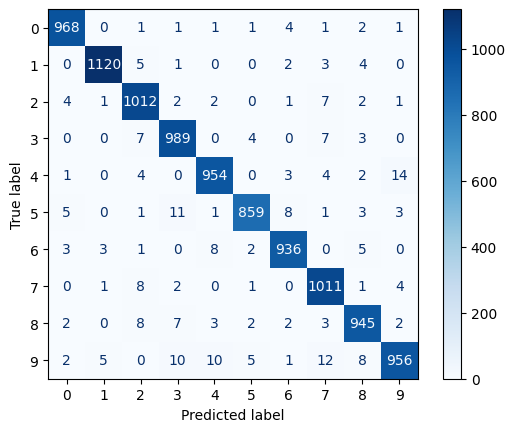

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

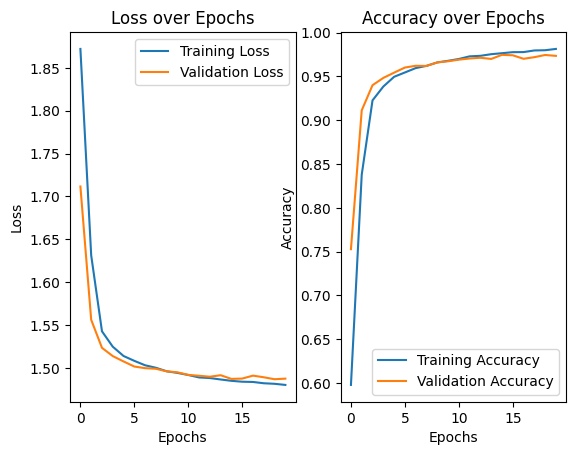

In [ ]:
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 13) modèle (784 -> 500 -> 120-> 10, activation sigmoid) avec Dropout 50 epochs

### Entraînement du modèle

In [ ]:
num_epochs = 50
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(modelD, train_loader, optimizer, criterion)
    val_loss, val_acc = eval_epoch(modelD, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f} , val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")

Epoch 1/50, train loss: 1.4792 , val loss: 1.4868, train acc: 0.9824, val acc: 0.9750
Epoch 2/50, train loss: 1.4799 , val loss: 1.4868, train acc: 0.9816, val acc: 0.9752
Epoch 3/50, train loss: 1.4772 , val loss: 1.4838, train acc: 0.9845, val acc: 0.9775
Epoch 4/50, train loss: 1.4774 , val loss: 1.4843, train acc: 0.9841, val acc: 0.9778
Epoch 5/50, train loss: 1.4763 , val loss: 1.4850, train acc: 0.9850, val acc: 0.9758
Epoch 6/50, train loss: 1.4757 , val loss: 1.4850, train acc: 0.9858, val acc: 0.9760
Epoch 7/50, train loss: 1.4757 , val loss: 1.4840, train acc: 0.9858, val acc: 0.9772
Epoch 8/50, train loss: 1.4749 , val loss: 1.4823, train acc: 0.9867, val acc: 0.9795
Epoch 9/50, train loss: 1.4748 , val loss: 1.4845, train acc: 0.9866, val acc: 0.9772
Epoch 10/50, train loss: 1.4742 , val loss: 1.4823, train acc: 0.9873, val acc: 0.9795
Epoch 11/50, train loss: 1.4739 , val loss: 1.4827, train acc: 0.9874, val acc: 0.9783
Epoch 12/50, train loss: 1.4732 , val loss: 1.4830, 

### Evaluation sur le test set

In [ ]:
modelD.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(modelD, test_loader, criterion)

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = modelD(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModelL test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


ModelL test accuracy: 0.9809, test loss: 1.4802


## 14) modèle (784 -> 500 -> 120-> 10, activation LeakyReLU) avec Dropout et BatchNormalization

### Définition du modèle

In [ ]:
class Model11(nn.Module):
    def __init__(self):
        super(Model11, self).__init__()
        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(28*28, 784)
        self.act1 = nn.LeakyReLU(0.1)
        self.bn1 = nn.BatchNorm1d(784)
        self.drop1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(784, 500)
        self.act2 = nn.LeakyReLU(0.1)
        self.bn2 = nn.BatchNorm1d(500)
        self.drop2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(500, 120)
        self.act3 = nn.LeakyReLU(0.1)
        self.bn3 = nn.BatchNorm1d(120)
        self.drop3 = nn.Dropout(0.1)

        self.fc4 = nn.Linear(120, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.drop1(self.bn1(self.act1(self.fc1(x))))
        x = self.drop2(self.bn2(self.act2(self.fc2(x))))
        x = self.drop3(self.bn3(self.act3(self.fc3(x))))
        x = self.softmax(self.fc4(x))
        return x
model11 = Model11()

### Fonction coût et optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model11.parameters())

### Entraînement du modèle

In [ ]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model11, train_loader, optimizer, criterion)
    val_loss, val_acc = eval_epoch(model11, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f} , val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")

Epoch 1/20, train loss: 1.5489 , val loss: 1.5042, train acc: 0.9278, val acc: 0.9617
Epoch 2/20, train loss: 1.5064 , val loss: 1.4991, train acc: 0.9581, val acc: 0.9642
Epoch 3/20, train loss: 1.4979 , val loss: 1.4918, train acc: 0.9655, val acc: 0.9713
Epoch 4/20, train loss: 1.4910 , val loss: 1.4904, train acc: 0.9718, val acc: 0.9712
Epoch 5/20, train loss: 1.4896 , val loss: 1.4910, train acc: 0.9730, val acc: 0.9705
Epoch 6/20, train loss: 1.4869 , val loss: 1.4886, train acc: 0.9753, val acc: 0.9725
Epoch 7/20, train loss: 1.4843 , val loss: 1.4879, train acc: 0.9778, val acc: 0.9740
Epoch 8/20, train loss: 1.4830 , val loss: 1.4838, train acc: 0.9789, val acc: 0.9777
Epoch 9/20, train loss: 1.4810 , val loss: 1.4858, train acc: 0.9810, val acc: 0.9763
Epoch 10/20, train loss: 1.4803 , val loss: 1.4838, train acc: 0.9816, val acc: 0.9770
Epoch 11/20, train loss: 1.4801 , val loss: 1.4852, train acc: 0.9817, val acc: 0.9765
Epoch 12/20, train loss: 1.4787 , val loss: 1.4833, 

### Evaluation sur le test set

In [ ]:
model11.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(model11, test_loader, criterion)

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = model11(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModel11 test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


Model11 test accuracy: 0.9795, test loss: 1.4812


## 15) PCA modèle (784 -> 500 -> 120-> 10, activation sigmoid)

### Reshape x_train et x_test

In [ ]:
# Flatten le dataset complet avant split
x_train_flat = train_dataset_full.data.view(-1, 28*28).float().numpy()
y_train_np   = train_dataset_full.targets.numpy()

x_test_flat  = test_dataset_full.data.view(-1, 28*28).float().numpy()
y_test_np    = test_dataset_full.targets.numpy()


In [ ]:
x_train_np = x_train_flat.numpy()
x_test_np  = x_test_flat.numpy()


### Application du PCA

In [ ]:
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca  = pca.transform(x_test_flat)

### Convertir les tensors

In [ ]:
x_train_tensor = torch.tensor(x_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)
x_test_tensor  = torch.tensor(x_test_pca, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test_np, dtype=torch.long)

### Créer les DataLoader

In [ ]:
train_dataset_pca = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset_pca  = TensorDataset(x_test_tensor, y_test_tensor)

train_loader_pca = DataLoader(train_dataset_pca, batch_size=128, shuffle=True)
test_loader_pca  = DataLoader(test_dataset_pca, batch_size=128)

### Définition du modèle

In [ ]:
class ModelPCA(nn.Module):
    def __init__(self):
        super(ModelPCA, self).__init__()
        self.fc1 = nn.Linear(100, 784)
        self.fc2 = nn.Linear(784, 500)
        self.fc3 = nn.Linear(500, 120)
        self.fc4 = nn.Linear(120, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x
model_pca = ModelPCA()

### Fonction de coût et optimiseur

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pca.parameters())

### Entraînement du modèle

In [ ]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []
for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model_pca, train_loader_pca, optimizer, criterion)
    val_loss, val_acc = eval_epoch(model_pca, test_loader_pca, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}, Train acc: {train_acc:.4f}, Val acc: {val_acc:.4f}")

Epoch 1/20, Train loss: 1.5169, Val loss: 1.5121, Train acc: 0.9483, Val acc: 0.9530
Epoch 2/20, Train loss: 1.5053, Val loss: 1.5090, Train acc: 0.9589, Val acc: 0.9540
Epoch 3/20, Train loss: 1.4982, Val loss: 1.5053, Train acc: 0.9653, Val acc: 0.9579
Epoch 4/20, Train loss: 1.4921, Val loss: 1.4991, Train acc: 0.9716, Val acc: 0.9636
Epoch 5/20, Train loss: 1.4886, Val loss: 1.4986, Train acc: 0.9747, Val acc: 0.9646
Epoch 6/20, Train loss: 1.4860, Val loss: 1.4981, Train acc: 0.9773, Val acc: 0.9642
Epoch 7/20, Train loss: 1.4830, Val loss: 1.4982, Train acc: 0.9796, Val acc: 0.9642
Epoch 8/20, Train loss: 1.4818, Val loss: 1.4947, Train acc: 0.9810, Val acc: 0.9673
Epoch 9/20, Train loss: 1.4801, Val loss: 1.4950, Train acc: 0.9826, Val acc: 0.9674
Epoch 10/20, Train loss: 1.4791, Val loss: 1.4961, Train acc: 0.9833, Val acc: 0.9666
Epoch 11/20, Train loss: 1.4782, Val loss: 1.4915, Train acc: 0.9841, Val acc: 0.9700
Epoch 12/20, Train loss: 1.4770, Val loss: 1.4940, Train acc: 0

### Évaluation sur le test set

In [ ]:
model_pca.eval()
all_preds, all_labels = [], []

test_loss, test_acc = eval_epoch(model_pca, test_loader_pca, criterion)

with torch.no_grad():
    for xb, yb in test_loader_pca:
        outputs = model_pca(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

print(f"\nModelPCA test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")



ModelPCA test accuracy: 0.9747, test loss: 1.4875


## 16) Data Augmentation modèle (512 -> 256 -> 10, activation: ReLU)

### Définition de Data Augmentation

In [6]:
train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.RandomResizedCrop(28, scale=(0.9, 1.1)),
    transforms.ToTensor(),
])
# Pour test : juste normalisation (pas d’augmentation)
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

In [7]:
# Téléchargement MNIST
train_dataset_aug = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=train_transform)
test_dataset_aug  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=test_transform)

# Split train/validation
val_size_aug = int(0.1 * len(train_dataset_aug))
train_size_aug = len(train_dataset_aug) - val_size_aug
train_dataset_aug, val_dataset_aug = random_split(train_dataset_aug, [train_size_aug, val_size_aug])

# Créer les DataLoaders
train_loader_aug = DataLoader(train_dataset_aug, batch_size=128, shuffle=True)
val_loader_aug   = DataLoader(val_dataset_aug, batch_size=128)
test_loader_aug  = DataLoader(test_dataset_aug, batch_size=128)



### Définition du modèle

In [8]:
class ModelAug(nn.Module):
    def __init__(self):
        super(ModelAug, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x
model_aug = ModelAug()

### Fonction coût et optimiseur



In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_aug.parameters())

### Entraînement du modèle

In [12]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model_aug, train_loader_aug, optimizer, criterion)
    val_loss, val_acc = eval_epoch(model_aug, val_loader_aug, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")


Epoch 1/20, train loss: 1.8336, val loss: 1.6917, train acc: 0.6373, val acc: 0.7795
Epoch 2/20, train loss: 1.6108, val loss: 1.5635, train acc: 0.8585, val acc: 0.9033
Epoch 3/20, train loss: 1.5483, val loss: 1.5507, train acc: 0.9170, val acc: 0.9128
Epoch 4/20, train loss: 1.5352, val loss: 1.5301, train acc: 0.9286, val acc: 0.9343
Epoch 5/20, train loss: 1.5260, val loss: 1.5285, train acc: 0.9370, val acc: 0.9352
Epoch 6/20, train loss: 1.5216, val loss: 1.5233, train acc: 0.9410, val acc: 0.9387
Epoch 7/20, train loss: 1.5182, val loss: 1.5169, train acc: 0.9442, val acc: 0.9460
Epoch 8/20, train loss: 1.5148, val loss: 1.5165, train acc: 0.9477, val acc: 0.9445
Epoch 9/20, train loss: 1.5141, val loss: 1.5167, train acc: 0.9481, val acc: 0.9442
Epoch 10/20, train loss: 1.5114, val loss: 1.5215, train acc: 0.9506, val acc: 0.9412
Epoch 11/20, train loss: 1.5091, val loss: 1.5093, train acc: 0.9528, val acc: 0.9520
Epoch 12/20, train loss: 1.5079, val loss: 1.5064, train acc: 0

### Evaluation sur le test set

In [13]:
model_aug.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(model_aug, test_loader_aug, criterion)
with torch.no_grad():
    for xb, yb in test_loader_aug:
        outputs = model_aug(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())
print(f"\nModel_aug test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")



Model_aug test accuracy: 0.9806, test loss: 1.4804


## 17) Data Augmentation, Sigmoid, Dropout et Normalisation

### Définition du modèle

In [14]:
class ModelAug2(nn.Module):
    def __init__(self):
        super(ModelAug2, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 784)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(784, 500)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(500, 120)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(120, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.sigmoid(self.fc1(x))
        x = self.dropout1(x)
        x = self.sigmoid(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x))
        return x
model_aug2 = ModelAug2()

### Fonction de coût et optimiseur

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_aug2.parameters())

### Entraînement du modèle

In [16]:
num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model_aug2, train_loader_aug, optimizer, criterion)
    val_loss, val_acc = eval_epoch(model_aug2, val_loader_aug, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")


Epoch 1/20, train loss: 2.0939, val loss: 1.8963, train acc: 0.3676, val acc: 0.5778
Epoch 2/20, train loss: 1.8333, val loss: 1.7505, train acc: 0.6382, val acc: 0.7245
Epoch 3/20, train loss: 1.7289, val loss: 1.6740, train acc: 0.7412, val acc: 0.7913
Epoch 4/20, train loss: 1.6787, val loss: 1.6465, train acc: 0.7869, val acc: 0.8158
Epoch 5/20, train loss: 1.6584, val loss: 1.6312, train acc: 0.8059, val acc: 0.8308
Epoch 6/20, train loss: 1.6463, val loss: 1.6034, train acc: 0.8169, val acc: 0.8665
Epoch 7/20, train loss: 1.5938, val loss: 1.5526, train acc: 0.8738, val acc: 0.9103
Epoch 8/20, train loss: 1.5669, val loss: 1.5396, train acc: 0.8984, val acc: 0.9228
Epoch 9/20, train loss: 1.5567, val loss: 1.5350, train acc: 0.9073, val acc: 0.9292
Epoch 10/20, train loss: 1.5493, val loss: 1.5299, train acc: 0.9141, val acc: 0.9317
Epoch 11/20, train loss: 1.5465, val loss: 1.5289, train acc: 0.9167, val acc: 0.9318
Epoch 12/20, train loss: 1.5412, val loss: 1.5262, train acc: 0

### Évaluation sur le test set

In [17]:
model_aug2.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(model_aug2, test_loader_aug, criterion)
with torch.no_grad():
    for xb, yb in test_loader_aug:
        outputs = model_aug2(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())
print(f"\nModel_aug2 test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")


Model_aug2 test accuracy: 0.9727, test loss: 1.4876


## 18) Data Augmentation, ReLU, Dropout et callback

### Définition du modèle

In [18]:
class ModelAug3(nn.Module):
    def __init__(self):
        super(ModelAug3, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 1024)
        self.relu1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.drop2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(512, 256)
        self.relu3 = nn.ReLU()
        self.drop3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(256, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.drop1(x)
        x = self.relu2(self.fc2(x))
        x = self.drop2(x)
        x = self.relu3(self.fc3(x))
        x = self.drop3(x)
        x = self.fc4(x)
        return x
model_aug3 = ModelAug3()

### Fonction de coût et optimiseur

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_aug3.parameters())

### Entraînement du modèle

In [20]:
num_epochs = 50
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model_aug3, train_loader_aug, optimizer, criterion)
    val_loss, val_acc = eval_epoch(model_aug3, val_loader_aug, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, val loss: {val_loss:.4f}, train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")


Epoch 1/50, train loss: 0.6380, val loss: 0.2657, train acc: 0.7930, val acc: 0.9140
Epoch 2/50, train loss: 0.2862, val loss: 0.2070, train acc: 0.9119, val acc: 0.9397
Epoch 3/50, train loss: 0.2361, val loss: 0.1658, train acc: 0.9279, val acc: 0.9470
Epoch 4/50, train loss: 0.2093, val loss: 0.1509, train acc: 0.9356, val acc: 0.9513
Epoch 5/50, train loss: 0.1960, val loss: 0.1319, train acc: 0.9402, val acc: 0.9595
Epoch 6/50, train loss: 0.1784, val loss: 0.1371, train acc: 0.9456, val acc: 0.9563
Epoch 7/50, train loss: 0.1735, val loss: 0.1064, train acc: 0.9469, val acc: 0.9660
Epoch 8/50, train loss: 0.1645, val loss: 0.1083, train acc: 0.9491, val acc: 0.9633
Epoch 9/50, train loss: 0.1550, val loss: 0.1134, train acc: 0.9527, val acc: 0.9635
Epoch 10/50, train loss: 0.1506, val loss: 0.1198, train acc: 0.9541, val acc: 0.9605
Epoch 11/50, train loss: 0.1489, val loss: 0.1012, train acc: 0.9544, val acc: 0.9665
Epoch 12/50, train loss: 0.1374, val loss: 0.0954, train acc: 0

### Évaluation sur le test set

In [21]:
model_aug3.eval()
all_preds, all_labels = [], []
test_loss, test_acc = eval_epoch(model_aug3, test_loader_aug, criterion)
with torch.no_grad():
    for xb, yb in test_loader_aug:
        outputs = model_aug3(xb)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())
print(f"\nModel_aug3 test accuracy: {test_acc:.4f}, test loss: {test_loss:.4f}")



Model_aug3 test accuracy: 0.9883, test loss: 0.0353


### Matrice de confusion

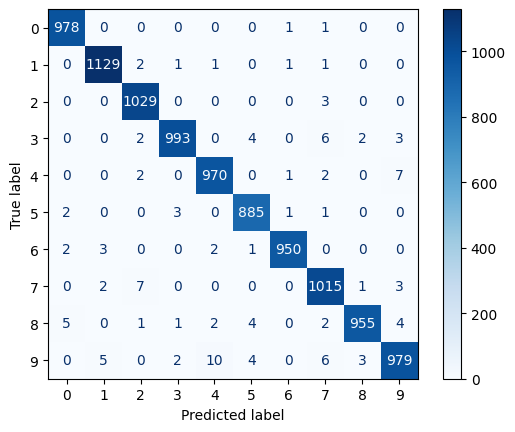

In [22]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

### Les courbes de perte et d'accuracy

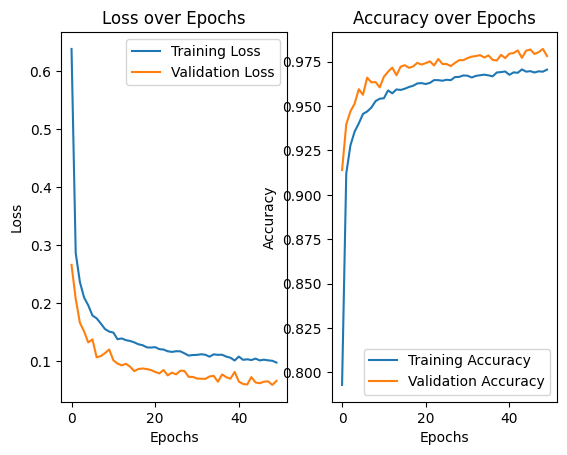

In [23]:
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Le modèle converge sans signe évident d’overfitting.
Les courbes de loss et d’accuracy sont cohérentes.

## Conclusion:
Le modèle avec data augmentation (architecture : 1024 → 512 → 256 → 10, activation ReLU), Dropout (0.3) et callbacks (ReduceLROnPlateau et EarlyStopping), entraîné avec TensorFlow, a atteint une accuracy de 0.9913 et une loss de test de 0.0288, ce qui en fait le modèle ayant fourni la meilleure performance.

Le dataset MNIST (composé d’images de chiffres) se prête particulièrement bien aux CNN, car ce type de réseau est spécialisé dans le traitement d’images et la reconnaissance de motifs spatiaux.
